In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns;
sns.set_style('darkgrid')
from collections import Counter

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.simplefilter('ignore')


#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:95% !important; }</style>"))

# Modeling
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [5]:
!pwd

/home/jhon/Documents/Personal_Plan/Project_3_ChurnRatePrediction/projectChurnRate


# 1. Dataset 
Dataset source: https://github.com/Paritoshyadav/Minimizing-Churn-Rate-Through-Analysis-of-Financial-Habits



## Dataset:

In [22]:
# Loading the data

dfChurnBank = pd.read_csv('../projectChurnRate/Data/churn_data.csv', index_col=0)

print("Size of the dataset:  %d" % df.shape[0])
print("Number of variables: %d" % df.shape[1])

if df.index.is_unique:
    print('Indexes are unique.')
else:
    print('There are duplicated indexes.')
    
dfChurnBank.head()

Size of the dataset:  21600
Number of variables: 30
There are duplicated indexes.


churn   age housing  credit_score  deposits  withdrawal  \
user                                                             
55409      0  37.0      na           NaN         0           0   
23547      0  28.0       R         486.0         0           0   
58313      0  35.0       R         561.0        47           2   
8095       0  26.0       R         567.0        26           3   
61353      1  27.0      na           NaN         0           0   

       purchases_partners  purchases  cc_taken  cc_recommended  ...  \
user                                                            ...   
55409                   0          0         0               0  ...   
23547                   1          0         0              96  ...   
58313                  86         47         0             285  ...   
8095                   38         25         0              74  ...   
61353                   2          0         0               0  ...   

       waiting_4_loan  cancelled_loan  received_loan  rejected_loan  \
user                                                                  
55409               0               0              0              0   
23547               0               0              0              0   
58313               0               0              0              0   
8095                0               0              0              0   
61353               0               0              0              0   

       zodiac_sign  left_for_two_month_plus  left_for_one_month  \
user                                                              
55409          Leo                        1                   0   
23547          Leo                        0                   0   
58313    Capricorn                        1                   0   
8095     Capricorn                        0                   0   
61353        Aries                        1                   0   

       rewards_earned  reward_rate is_referred  
user                                            
55409             NaN         0.00           0  
23547            44.0         1.47           1  
58313            65.0         2.17           0  
8095             33.0         1.10           1  
61353             1.0         0.03           0  

[5 rows x 30 columns]

In [23]:
# Split dataset for modeling and predicting

trainLen = int(len(dfChurnBank)*0.8)
dfChurnBank = dfChurnBank.sample(frac=1, random_state=0)
df = dfChurnBank.iloc[:trainLen].copy()
df_pred = dfChurnBank.iloc[trainLen:].copy()
print('Size of dataset for modeling is {}'.format(len(df)))
print('Size of dataset for prediction is {}'.format(len(df_pred)))

Size of dataset for modeling is 21600
Size of dataset for prediction is 5400


# 2. Exploratory Data Analysis

We will explore Dataset 2 - dfChurnBank. For do this, we need to clean data before start EDA.

1. Checking Null and na values 
2. Check if index is duplicated
3. Verify balance data on dataset (dfChurnBankistribution)
4. Dataframe data type analysis - Categorical and numerical
5. Check outliers
6. Analysis of Churn over features
7. Conclusions after exploration and analysis

In [24]:
print("Size of the dataset:  %d" % df.shape[0])
print("Number of variables: %d" % df.shape[1])
df.head(10)

Size of the dataset:  21600
Number of variables: 30


churn   age housing  credit_score  deposits  withdrawal  \
user                                                             
50488      0  20.0       R         375.0         0           0   
53603      0  38.0      na         544.0        16           1   
42289      1  40.0       R         566.0         0           0   
4185       0  34.0      na         547.0         0           0   
12436      1  24.0       O         488.0         0           0   
19988      0  25.0       R         539.0         0           0   
17437      0  52.0       R         578.0         0           0   
5743       1  27.0       O         652.0         0           0   
22154      1  39.0       R         519.0         0           0   
24158      0  25.0       R         521.0         0           0   

       purchases_partners  purchases  cc_taken  cc_recommended  ...  \
user                                                            ...   
50488                  29          0         0              56  ...   
53603                  28         15         0              41  ...   
42289                 119          0         0             218  ...   
4185                    0          0         0             196  ...   
12436                  38          0         0              78  ...   
19988                   0          0         2             207  ...   
17437                   0          0         0             229  ...   
5743                    0          0         0             288  ...   
22154                   6          0         0              69  ...   
24158                  74          0         0             193  ...   

       waiting_4_loan  cancelled_loan  received_loan  rejected_loan  \
user                                                                  
50488               0               0              0              0   
53603               0               0              0              0   
42289               0               0              0              0   
4185                0               0              0              0   
12436               0               0              0              0   
19988               0               0              0              0   
17437               0               0              0              0   
5743                0               0              0              0   
22154               0               0              0              0   
24158               0               0              0              0   

       zodiac_sign  left_for_two_month_plus  left_for_one_month  \
user                                                              
50488        Virgo                        0                   0   
53603  Sagittarius                        0                   0   
42289        Aries                        0                   0   
4185       Scorpio                        0                   0   
12436      Scorpio                        0                   0   
19988       Cancer                        0                   0   
17437       Pisces                        1                   0   
5743            na                        0                   0   
22154    Capricorn                        0                   0   
24158     Aquarius                        1                   0   

       rewards_earned  reward_rate is_referred  
user                                            
50488            11.0         0.44           1  
53603            20.0         0.67           1  
42289            19.0         0.63           1  
4185             62.0         2.07           0  
12436            22.0         0.73           1  
19988            60.0         2.00           1  
17437            66.0         2.20           0  
5743             79.0         2.63           0  
22154            17.0         0.57           1  
24158            37.0         1.23           0  

[10 rows x 30 columns]

As we can see, we are using as index the column 0 which is user(Customer ID). So it won't be necesary to remove it.

## 1. Checking Null and NaN values 
If there is nulls or na, we have to remove them before start EDA in order to have a good explorarion.

In [25]:
null_finder = df.isnull().sum()

print(" ***** Number of Null Values by row: ***** ")
null_finder.where(null_finder > 0).dropna()

 ***** Number of Null Values by row: ***** 


age                  4.0
credit_score      6436.0
rewards_earned    2569.0
dtype: float64

As we can see there are many null values on credit_score and rewards_earned columns. If we remove null values as rows, we will lost many data and dataset size will reduce a lot, so the best option it is to remove them. On the other hand, age column only has 4 null values, so we only drop null values as rows(axis=0).

In [26]:
# This function will be agregated to the pre-precessing pipeline:

def dropnull(df):
    df = df.drop(columns=['credit_score','rewards_earned'])
    df = df[pd.notnull(df['age'])]
    return df

df = dropnull(df)

null_finder = df.isnull().sum()

print(" ***** Number of Null Values by row: ***** ")
null_finder.where(null_finder > 0).dropna()

 ***** Number of Null Values by row: ***** 


Series([], dtype: float64)

In [27]:
print("Size of the dataset:  %d" % df.shape[0])
print("Number of variables: %d" % df.shape[1])
df.head(10)

Size of the dataset:  21596
Number of variables: 28


churn   age housing  deposits  withdrawal  purchases_partners  \
user                                                                   
50488      0  20.0       R         0           0                  29   
53603      0  38.0      na        16           1                  28   
42289      1  40.0       R         0           0                 119   
4185       0  34.0      na         0           0                   0   
12436      1  24.0       O         0           0                  38   
19988      0  25.0       R         0           0                   0   
17437      0  52.0       R         0           0                   0   
5743       1  27.0       O         0           0                   0   
22154      1  39.0       R         0           0                   6   
24158      0  25.0       R         0           0                  74   

       purchases  cc_taken  cc_recommended  cc_disliked  ...  payment_type  \
user                                                     ...                 
50488          0         0              56            0  ...     Bi-Weekly   
53603         15         0              41            0  ...       Monthly   
42289          0         0             218            0  ...            na   
4185           0         0             196            0  ...     Bi-Weekly   
12436          0         0              78            0  ...        Weekly   
19988          0         2             207            1  ...        Weekly   
17437          0         0             229            0  ...     Bi-Weekly   
5743           0         0             288            0  ...     Bi-Weekly   
22154          0         0              69            0  ...       Monthly   
24158          0         0             193            0  ...  Semi-Monthly   

       waiting_4_loan  cancelled_loan  received_loan  rejected_loan  \
user                                                                  
50488               0               0              0              0   
53603               0               0              0              0   
42289               0               0              0              0   
4185                0               0              0              0   
12436               0               0              0              0   
19988               0               0              0              0   
17437               0               0              0              0   
5743                0               0              0              0   
22154               0               0              0              0   
24158               0               0              0              0   

       zodiac_sign  left_for_two_month_plus  left_for_one_month reward_rate  \
user                                                                          
50488        Virgo                        0                   0        0.44   
53603  Sagittarius                        0                   0        0.67   
42289        Aries                        0                   0        0.63   
4185       Scorpio                        0                   0        2.07   
12436      Scorpio                        0                   0        0.73   
19988       Cancer                        0                   0        2.00   
17437       Pisces                        1                   0        2.20   
5743            na                        0                   0        2.63   
22154    Capricorn                        0                   0        0.57   
24158     Aquarius                        1                   0        1.23   

       is_referred  
user                
50488            1  
53603            1  
42289            1  
4185             0  
12436            1  
19988            1  
17437            0  
5743             0  
22154            1  
24158            0  

[10 rows x 28 columns]

## 2. Check if index is duplicated #######
If there is duplicated index, we have to remove them in order to have a good explorarion.

In [28]:
if df.index.is_unique:
    print('Indexes are unique.')
else:
    print('There are duplicated indexes.')
    
df.head()

There are duplicated indexes.


churn   age housing  deposits  withdrawal  purchases_partners  \
user                                                                   
50488      0  20.0       R         0           0                  29   
53603      0  38.0      na        16           1                  28   
42289      1  40.0       R         0           0                 119   
4185       0  34.0      na         0           0                   0   
12436      1  24.0       O         0           0                  38   

       purchases  cc_taken  cc_recommended  cc_disliked  ...  payment_type  \
user                                                     ...                 
50488          0         0              56            0  ...     Bi-Weekly   
53603         15         0              41            0  ...       Monthly   
42289          0         0             218            0  ...            na   
4185           0         0             196            0  ...     Bi-Weekly   
12436          0         0              78            0  ...        Weekly   

       waiting_4_loan  cancelled_loan  received_loan  rejected_loan  \
user                                                                  
50488               0               0              0              0   
53603               0               0              0              0   
42289               0               0              0              0   
4185                0               0              0              0   
12436               0               0              0              0   

       zodiac_sign  left_for_two_month_plus  left_for_one_month reward_rate  \
user                                                                          
50488        Virgo                        0                   0        0.44   
53603  Sagittarius                        0                   0        0.67   
42289        Aries                        0                   0        0.63   
4185       Scorpio                        0                   0        2.07   
12436      Scorpio                        0                   0        0.73   

       is_referred  
user                
50488            1  
53603            1  
42289            1  
4185             0  
12436            1  

[5 rows x 28 columns]

In [29]:

# This function will be agregated to the pre-precessing pipeline:
def dropduplicated(df):
    return df[~df.index.duplicated(keep='first')]

df = dropduplicated(df)

print("Size of the dataset:  %d" % df.shape[0])
print("Number of variables: %d" % df.shape[1])

if df.index.is_unique:
    print('Indexes are unique.')
else:
    print('There are duplicated indexes.')
    
df.head()

Size of the dataset:  20095
Number of variables: 28
Indexes are unique.


churn   age housing  deposits  withdrawal  purchases_partners  \
user                                                                   
50488      0  20.0       R         0           0                  29   
53603      0  38.0      na        16           1                  28   
42289      1  40.0       R         0           0                 119   
4185       0  34.0      na         0           0                   0   
12436      1  24.0       O         0           0                  38   

       purchases  cc_taken  cc_recommended  cc_disliked  ...  payment_type  \
user                                                     ...                 
50488          0         0              56            0  ...     Bi-Weekly   
53603         15         0              41            0  ...       Monthly   
42289          0         0             218            0  ...            na   
4185           0         0             196            0  ...     Bi-Weekly   
12436          0         0              78            0  ...        Weekly   

       waiting_4_loan  cancelled_loan  received_loan  rejected_loan  \
user                                                                  
50488               0               0              0              0   
53603               0               0              0              0   
42289               0               0              0              0   
4185                0               0              0              0   
12436               0               0              0              0   

       zodiac_sign  left_for_two_month_plus  left_for_one_month reward_rate  \
user                                                                          
50488        Virgo                        0                   0        0.44   
53603  Sagittarius                        0                   0        0.67   
42289        Aries                        0                   0        0.63   
4185       Scorpio                        0                   0        2.07   
12436      Scorpio                        0                   0        0.73   

       is_referred  
user                
50488            1  
53603            1  
42289            1  
4185             0  
12436            1  

[5 rows x 28 columns]

## 3. Verify balance data on dataset

Class Ratio of 0 is 0.56
Class Ratio of 1 is 0.44
Class Ratio of 1 over 0 is 0.80


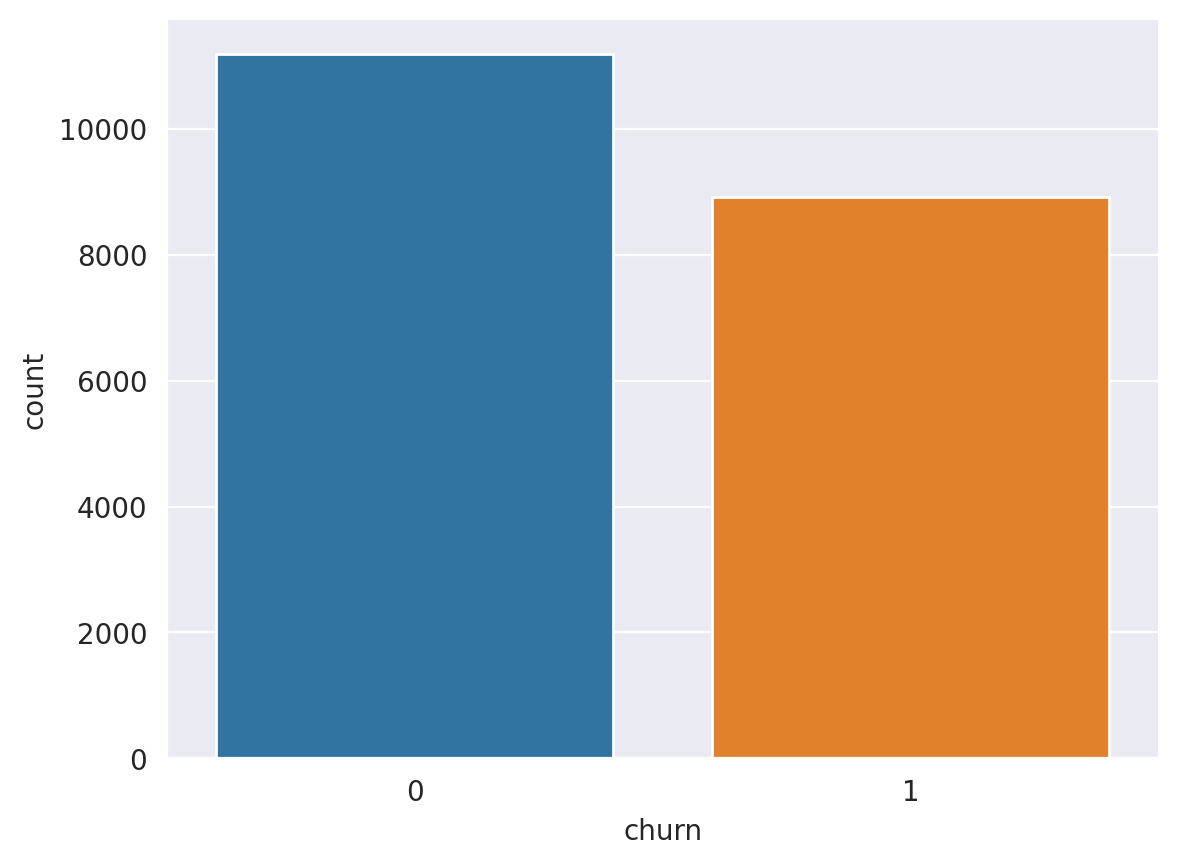

In [30]:
# Is it balanced? How is the ratio distribution?
# What is the type of class? 
# Plot the distribution
 
sns.countplot(x='churn', data=df)

class_ratio_0 = Counter(df['churn'])[0]/df['churn'].shape[0]
class_ratio_1 = Counter(df['churn'])[1]/df['churn'].shape[0]

print('Class Ratio of {:} is {:.2f}'.format(list(Counter(df['churn']).keys())[0], class_ratio_0))
print('Class Ratio of {:} is {:.2f}'.format(list(Counter(df['churn']).keys())[1], class_ratio_1))
print('Class Ratio of 1 over 0 is {:.2f}'.format(class_ratio_1/class_ratio_0))

As we can see, the ratio of the class variable is almost balanced. SO in this way, we won't need to use any technique for balance them.

* Class 1 -> churn
* Class 0 -> no churn

## 4. Dataframe data type analysis

In [31]:
####### Data type analysis #######
df.dtypes

churn                        int64
age                        float64
housing                     object
deposits                     int64
withdrawal                   int64
purchases_partners           int64
purchases                    int64
cc_taken                     int64
cc_recommended               int64
cc_disliked                  int64
cc_liked                     int64
cc_application_begin         int64
app_downloaded               int64
web_user                     int64
app_web_user                 int64
ios_user                     int64
android_user                 int64
registered_phones            int64
payment_type                object
waiting_4_loan               int64
cancelled_loan               int64
received_loan                int64
rejected_loan                int64
zodiac_sign                 object
left_for_two_month_plus      int64
left_for_one_month           int64
reward_rate                float64
is_referred                  int64
dtype: object

In [32]:
# Separation of data types for EDA

cat_features = df.select_dtypes(exclude = np.number).columns
num_features = df.select_dtypes(include = np.number).columns
print( "Quantity of Categorical features: ", len(cat_features),"\nCategorical features: ", cat_features)
print( "\nQuantity of Numerical features: ", len(num_features),"\nNumerical features: ", num_features)

Quantity of Categorical features:  3 
Categorical features:  Index(['housing', 'payment_type', 'zodiac_sign'], dtype='object')

Quantity of Numerical features:  25 
Numerical features:  Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user',
       'ios_user', 'android_user', 'registered_phones', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'is_referred'],
      dtype='object')


### 4.1.  Categorical analysis:

In [33]:

print("Different quantity values: " ,list(map(lambda col: (col,len(df[col].value_counts())), df.select_dtypes(exclude = np.number).columns)))

print("\nhousing feature values: ", df['housing'].unique() ,
      "\npayment_type feature value: ", df['payment_type'].unique() ,
      "\nzodiac_sign feature values: ", df['zodiac_sign'].unique())

Different quantity values:  [('housing', 3), ('payment_type', 5), ('zodiac_sign', 13)]

housing feature values:  ['R' 'na' 'O'] 
payment_type feature value:  ['Bi-Weekly' 'Monthly' 'na' 'Weekly' 'Semi-Monthly'] 
zodiac_sign feature values:  ['Virgo' 'Sagittarius' 'Aries' 'Scorpio' 'Cancer' 'Pisces' 'na'
 'Capricorn' 'Aquarius' 'Libra' 'Leo' 'Taurus' 'Gemini']


We can see that those values cannot be binarized because they has more than 2 values. For remove 'na' values we have to check the amount of those values.

In [34]:
# Counting "na" values:

print("na values from housing: ", len(df[df['housing'] ==  'na']) )
print("na values from payment_type: ", len(df[df['payment_type'] ==  'na']) )
print("na values from zodiac:sign: ", len(df[df['zodiac_sign'] ==  'na']) )


na values from housing:  10373
na values from payment_type:  2883
na values from zodiac:sign:  1570


As we can see, there are a lot of 'na' values. We cannot remove them. We need to consider these values as no house, no payment_type, no zodiac_sign.

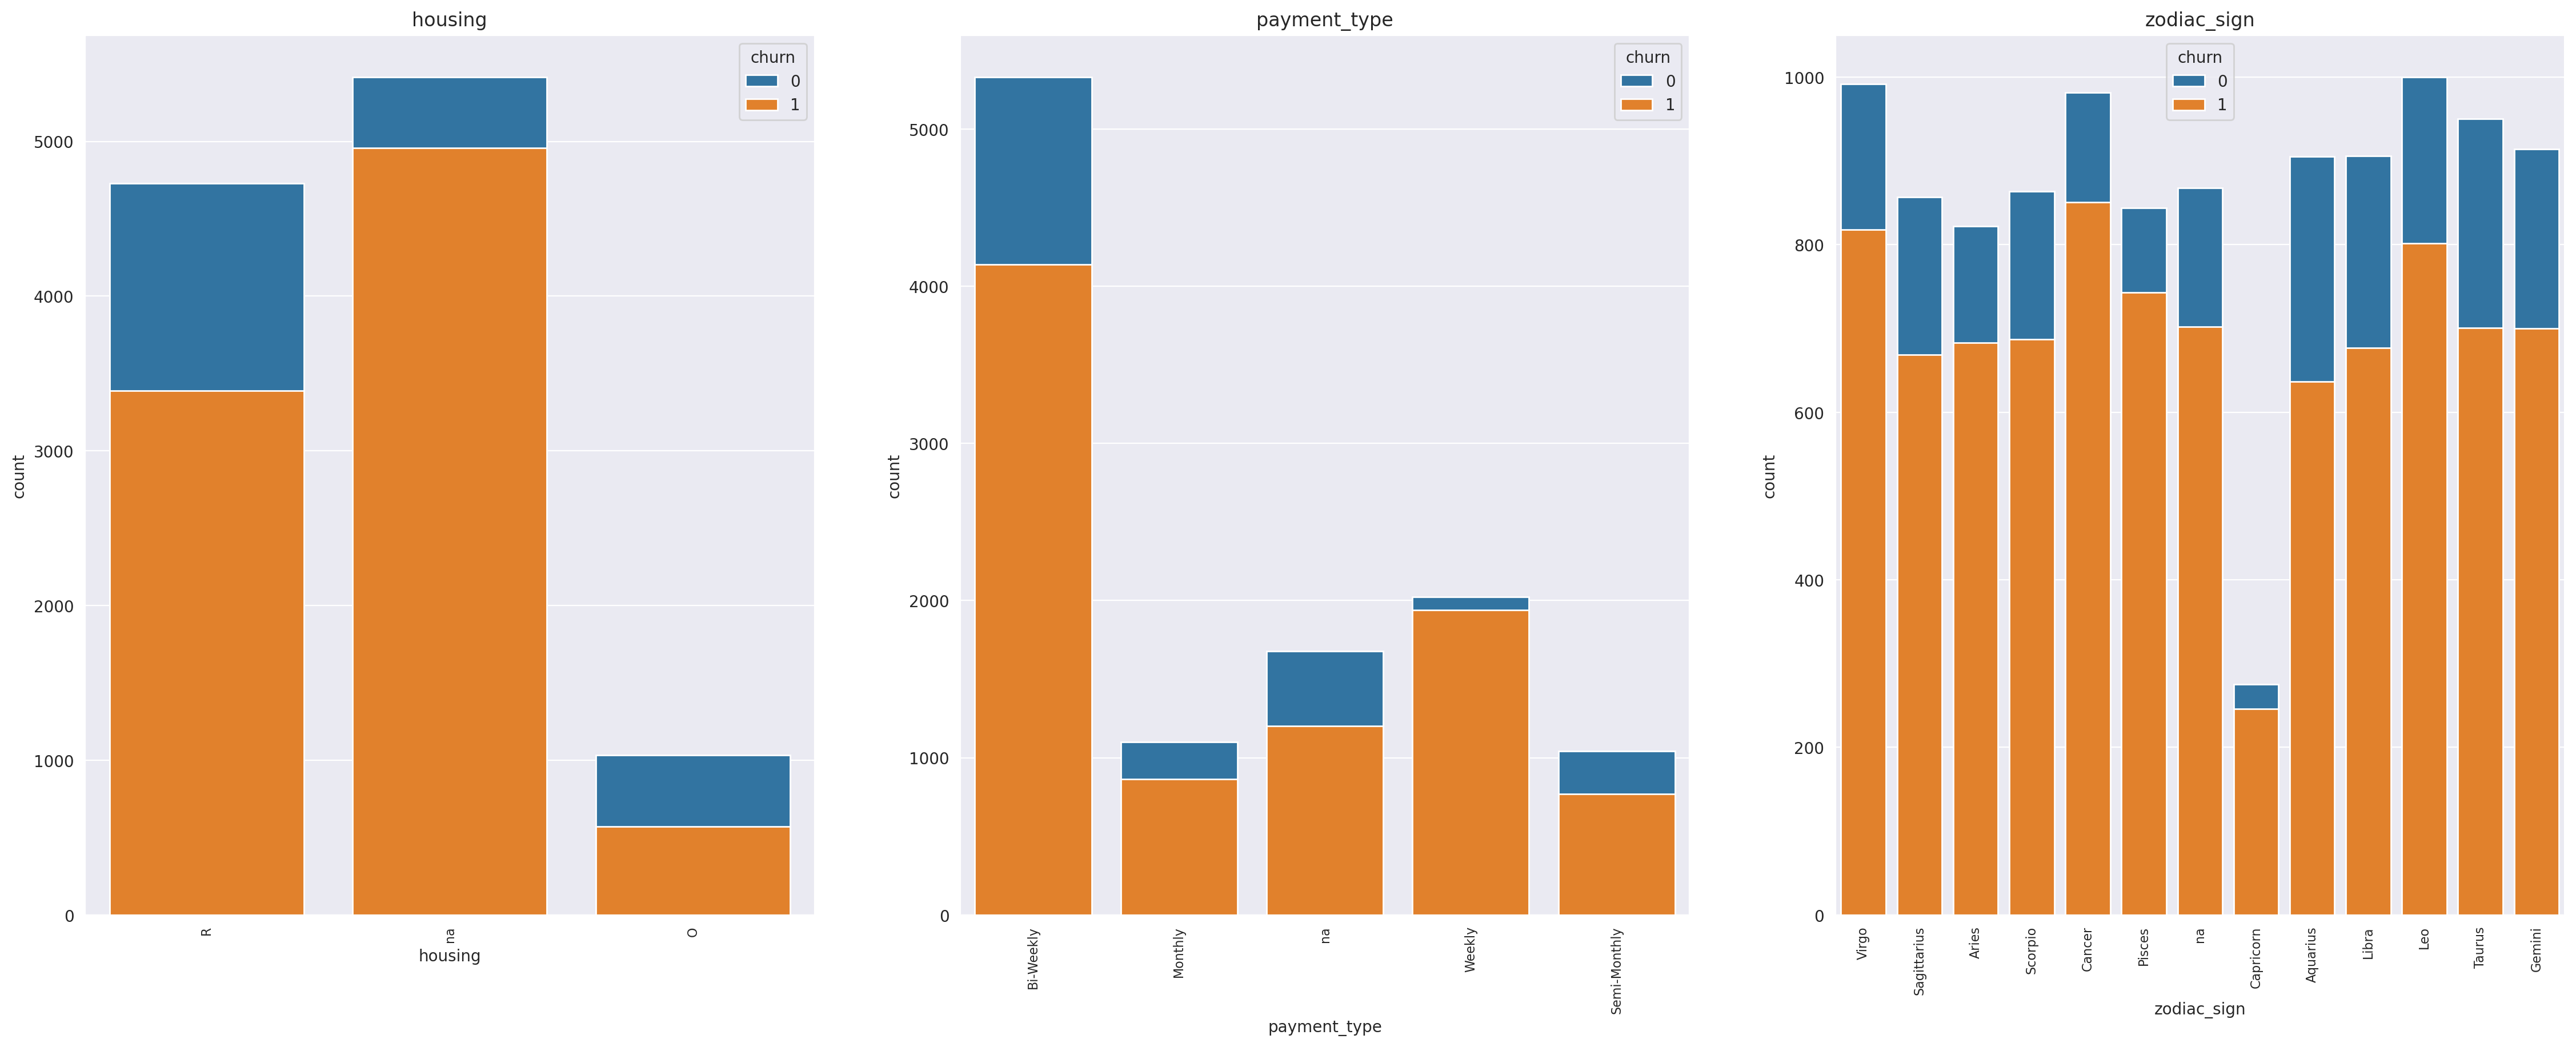

In [35]:
# Analysis each categorical feature by churn quantity in order to know which one is more relevant than other.

fig, axs = plt.subplots(1, len(cat_features), figsize=(28, 10))

for col, ax in enumerate(axs.flatten()):
    sns.countplot(x=cat_features[col], hue='churn', dodge=False, data=df, ax = axs[col])
    ax.set_title(cat_features[col])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
    

As we can see, this values should be traslate to numbers with one hot encoding technique in order to keep the size of dataset. Categorical values should be considered becuase it affect on churn behavior. Here some insights:
- The people who has the Bi-weekly payment_type churn more than others
- The people who Rent(R) churn more than people who Own(O) his home.


### 4.2. Numerical analysis

<AxesSubplot:>

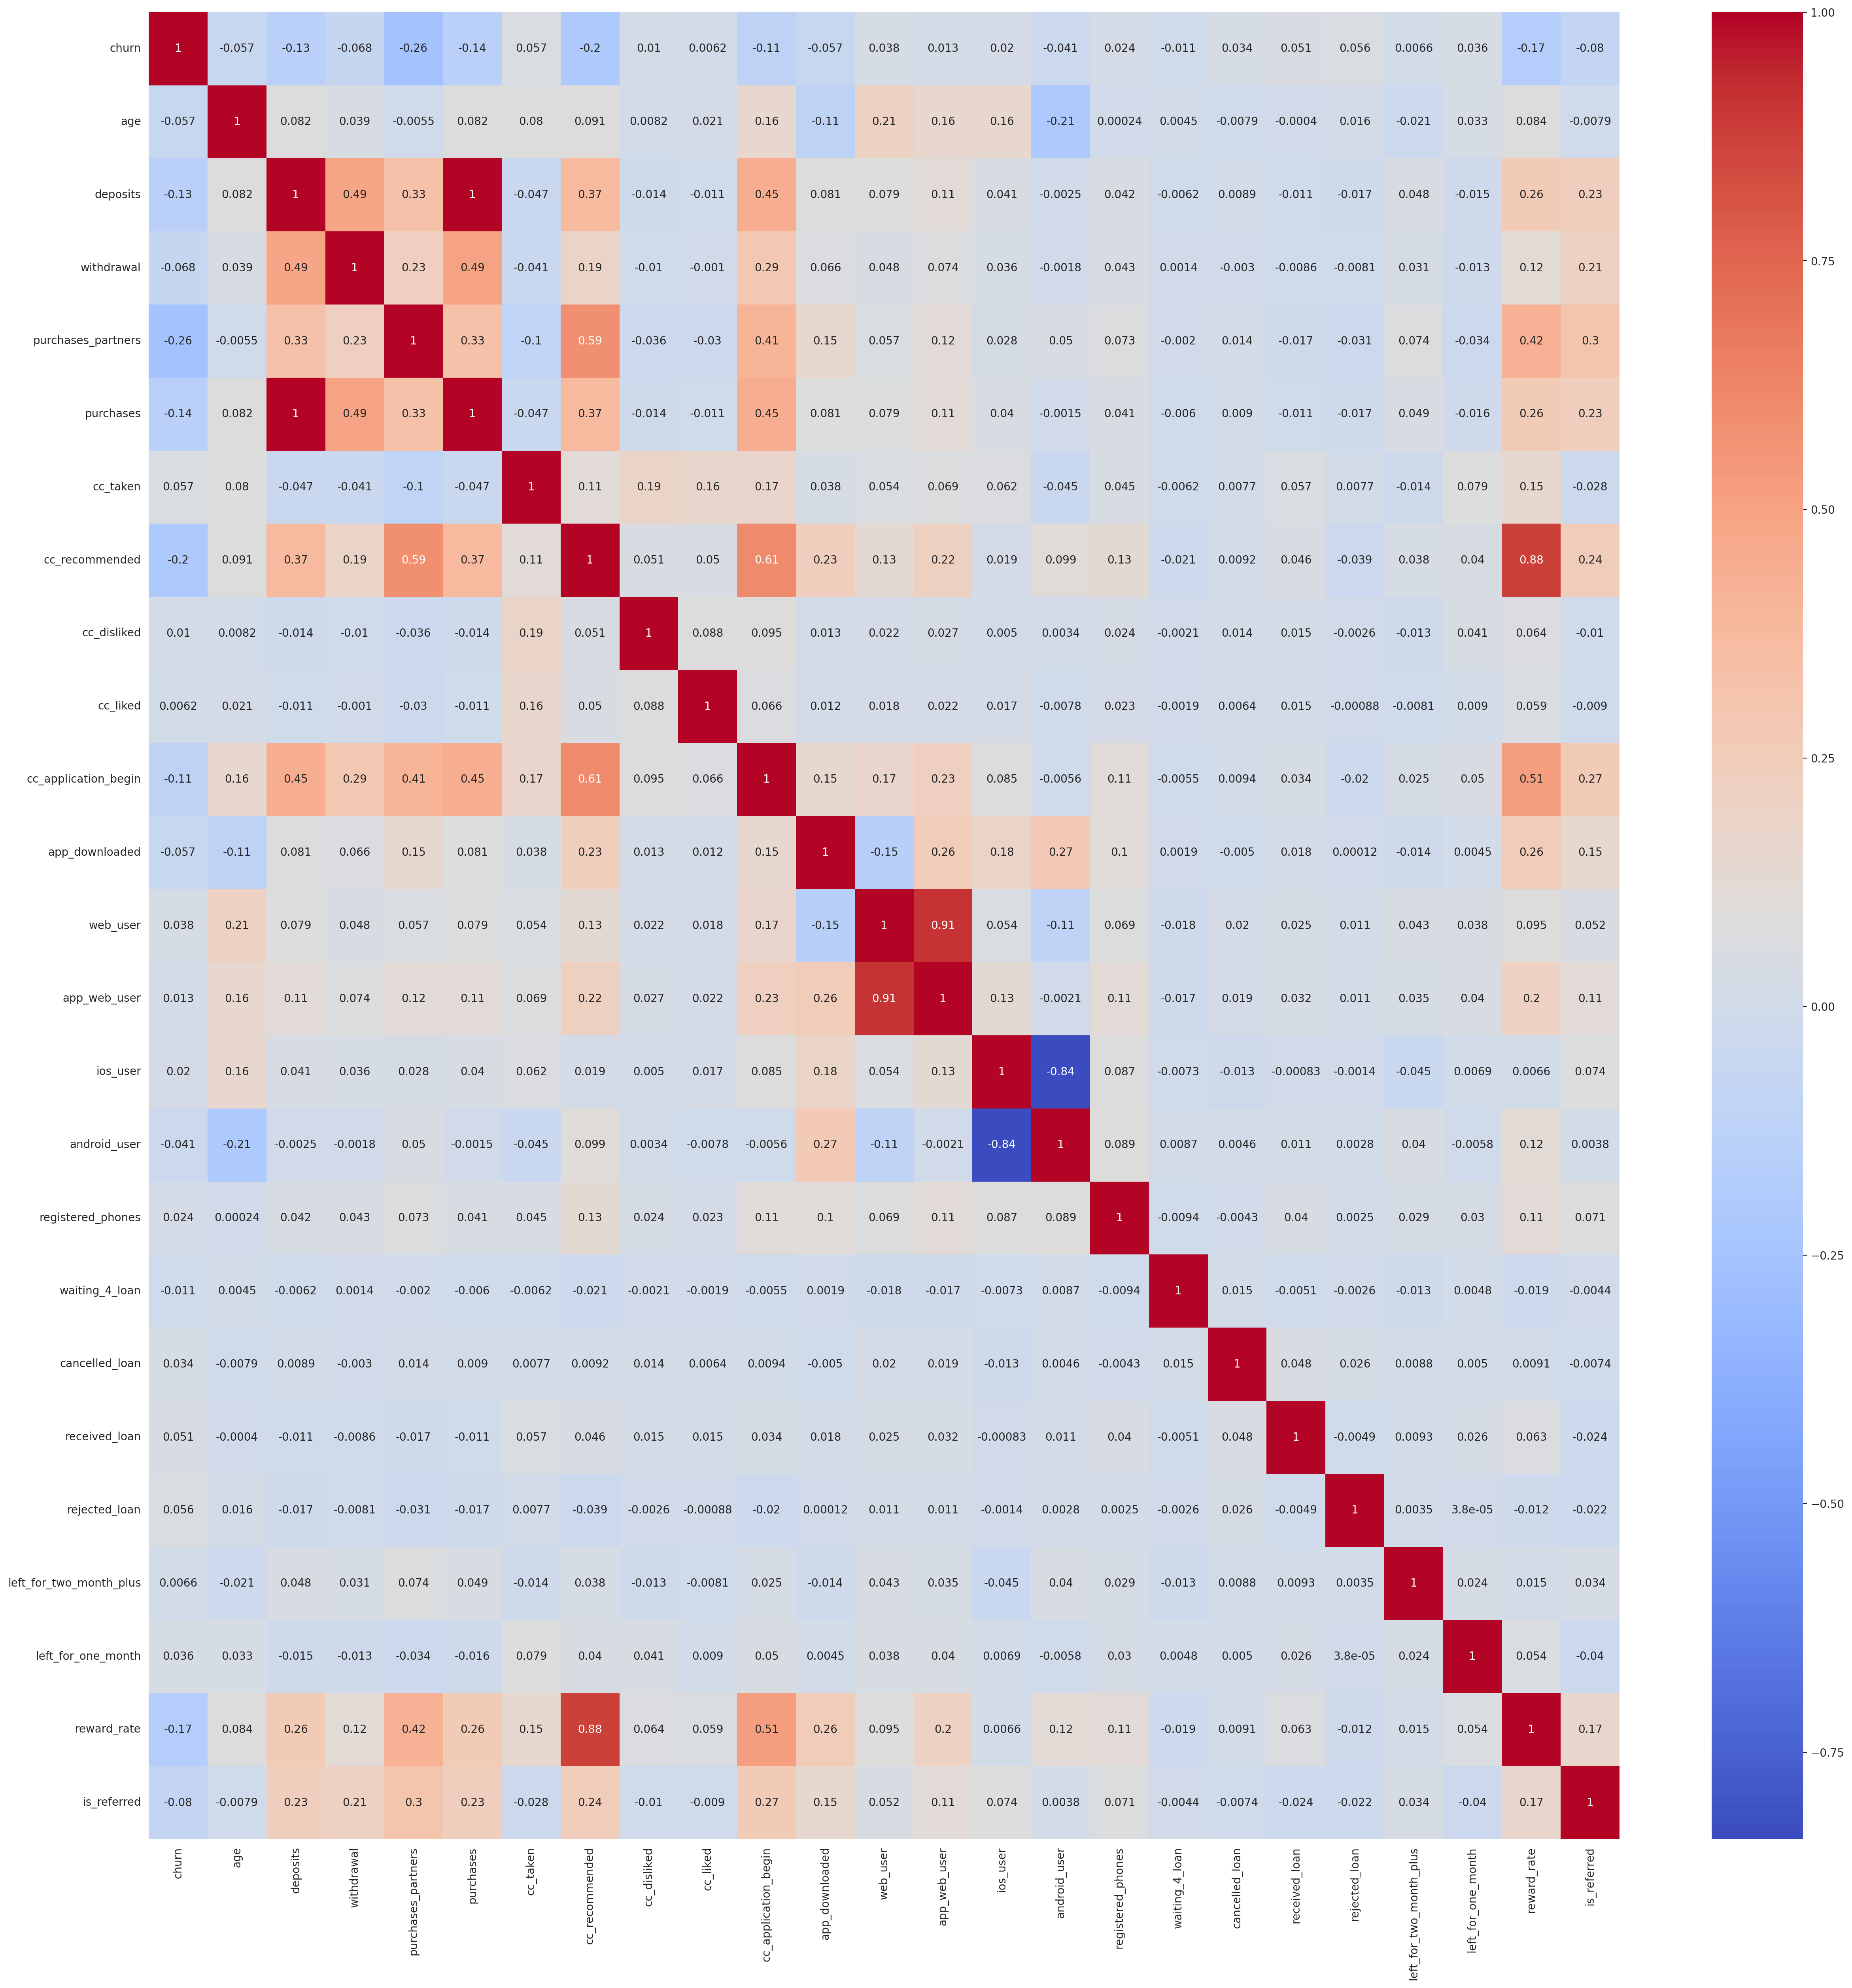

In [36]:
plt.figure(figsize =(30,30))
sns.heatmap(df[num_features].corr(),annot=True,cmap='coolwarm')

From correlation matrix, we can get some insights like the following:
- correlation 0.91 between app_web_user and web_user. It means they are positively depended so we can ommit one of them.
- correlation 0.88 between reward_rate and cc_recommended. It means they are positively depended so we can ommit one of them.
- correlation -0.84 between android_user and ios_user. It means they are negatively depended so we can ommit one of them.
- correlation 1 between purchases and deposit. It means they are positively depended so we can ommit one of them.


In [37]:
# Quantity of numerical values:

list(map(lambda col: (col,len(df[col].value_counts())), df.select_dtypes(include = np.number).columns))

[('churn', 2),
 ('age', 69),
 ('deposits', 66),
 ('withdrawal', 20),
 ('purchases_partners', 281),
 ('purchases', 64),
 ('cc_taken', 11),
 ('cc_recommended', 324),
 ('cc_disliked', 20),
 ('cc_liked', 8),
 ('cc_application_begin', 123),
 ('app_downloaded', 2),
 ('web_user', 2),
 ('app_web_user', 2),
 ('ios_user', 2),
 ('android_user', 2),
 ('registered_phones', 5),
 ('waiting_4_loan', 2),
 ('cancelled_loan', 2),
 ('received_loan', 2),
 ('rejected_loan', 2),
 ('left_for_two_month_plus', 2),
 ('left_for_one_month', 2),
 ('reward_rate', 186),
 ('is_referred', 2)]

As we can see there are many binary fearures and many of them are longer than 2. 

First, we will explore features which has more than 2 different values because there are many like ('registered_phones', 5), ('cc_disliked', 20),  ('cc_taken', 11) and ('withdrawal', 20) which have specific values.

In [40]:
num_features_new = list(filter(lambda col: len(df[col].value_counts()) > 2, num_features))
num_features_bin = list(filter(lambda col: len(df[col].value_counts()) == 2, num_features))

print("Quantity of features greater than 2:", len(num_features_new))
print(num_features_new)
print()
print("Quantity of features equal to 2(binary):", len(num_features_bin))
print(num_features_bin)

Quantity of features greater than 2: 12
['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin', 'registered_phones', 'reward_rate']

Quantity of features equal to 2(binary): 13
['churn', 'app_downloaded', 'web_user', 'app_web_user', 'ios_user', 'android_user', 'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan', 'left_for_two_month_plus', 'left_for_one_month', 'is_referred']


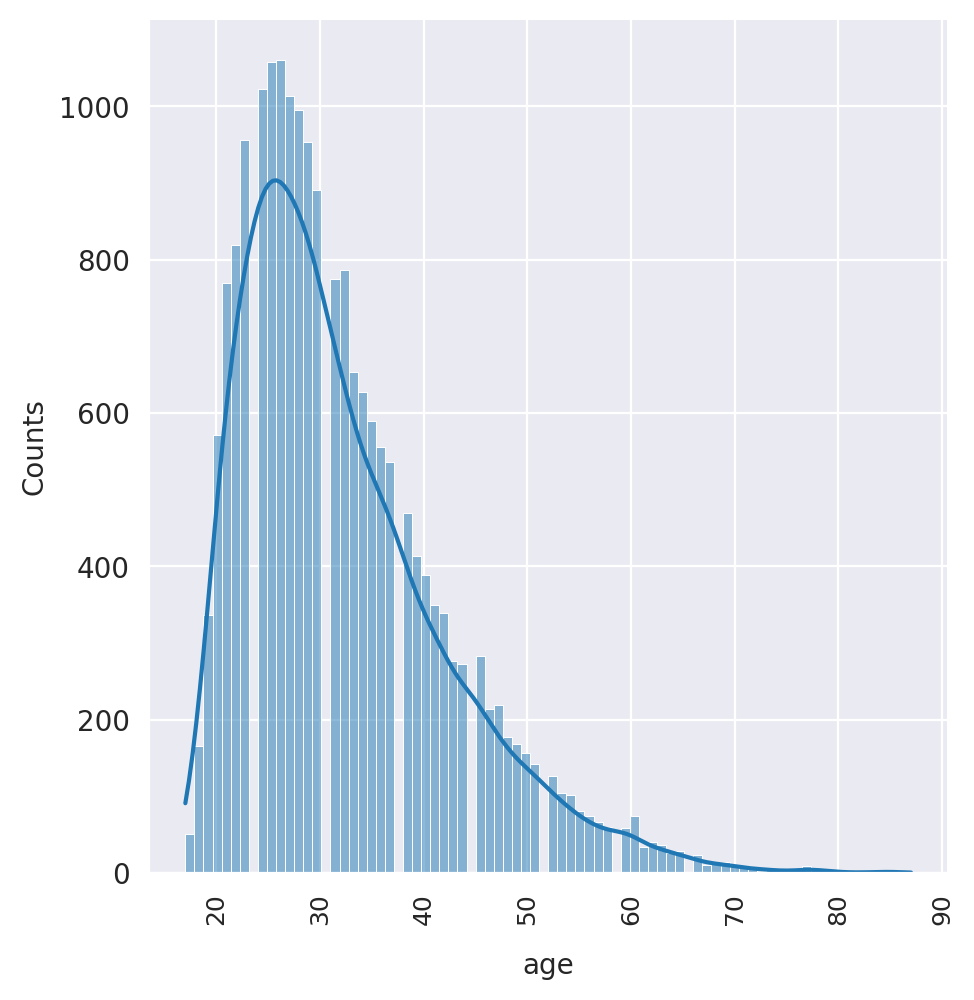

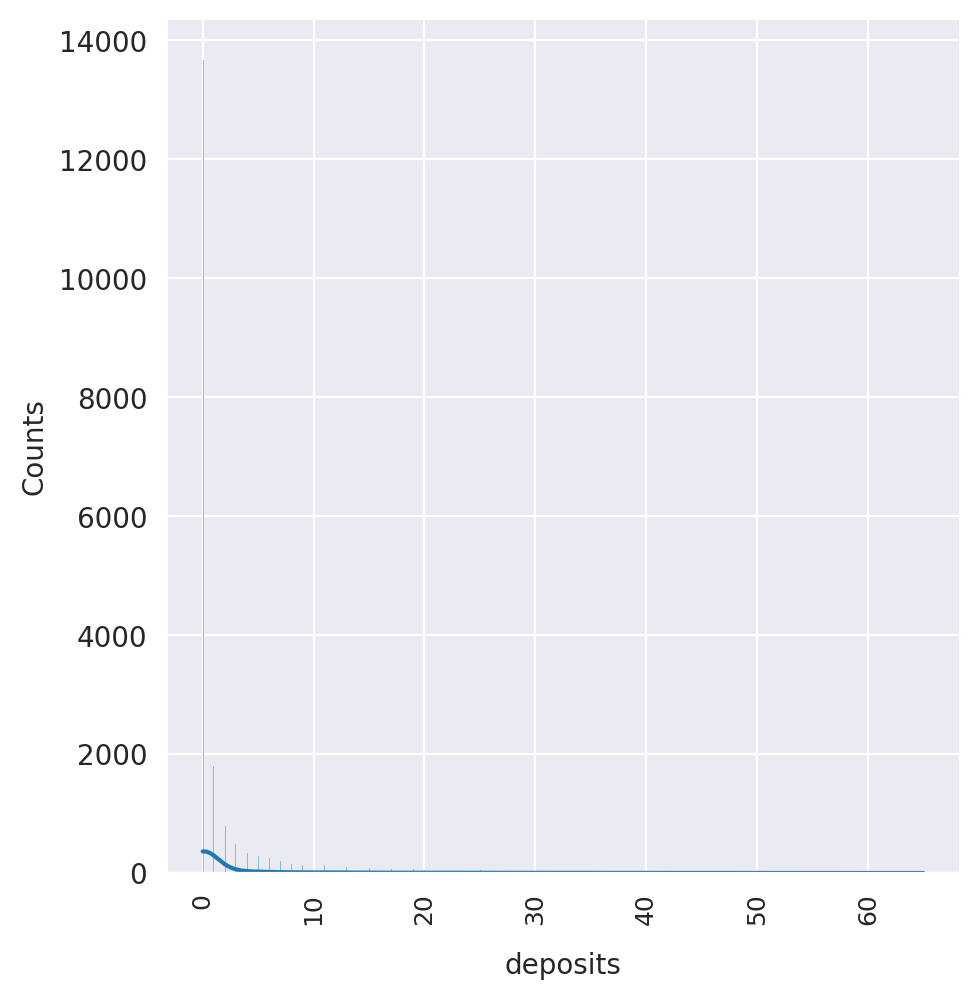

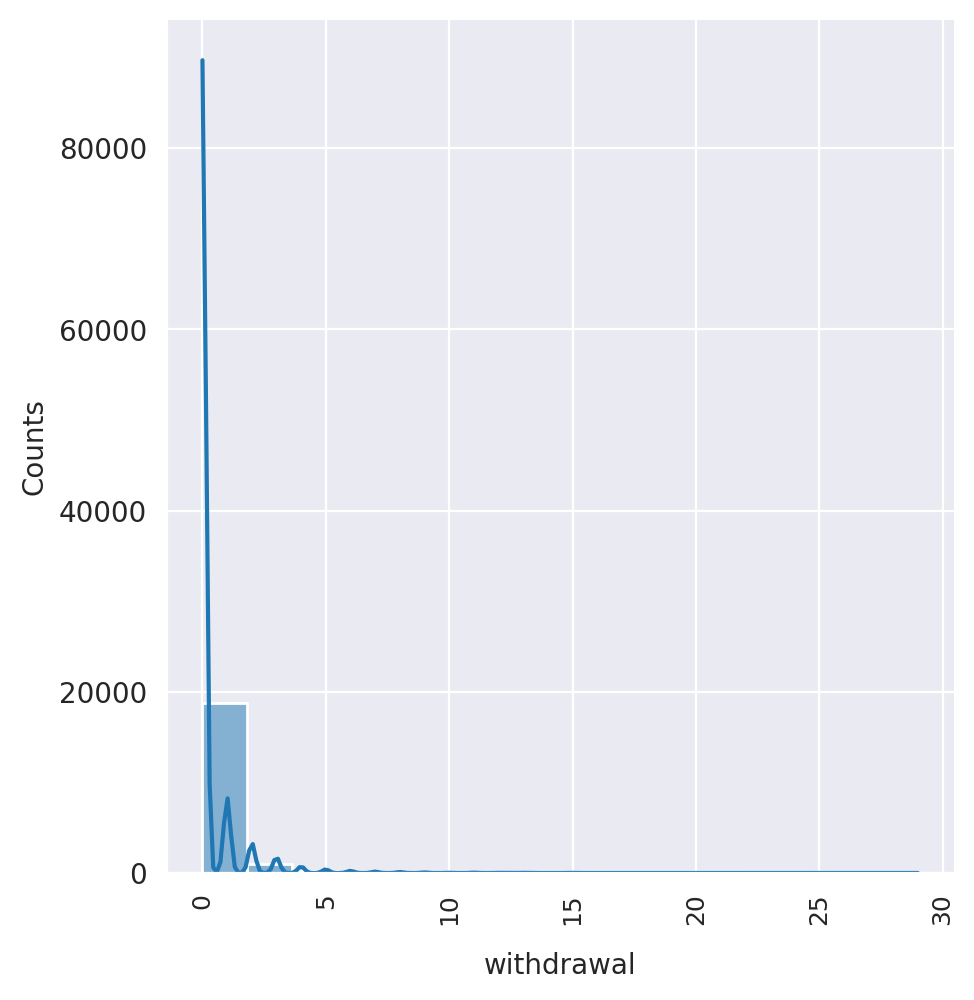

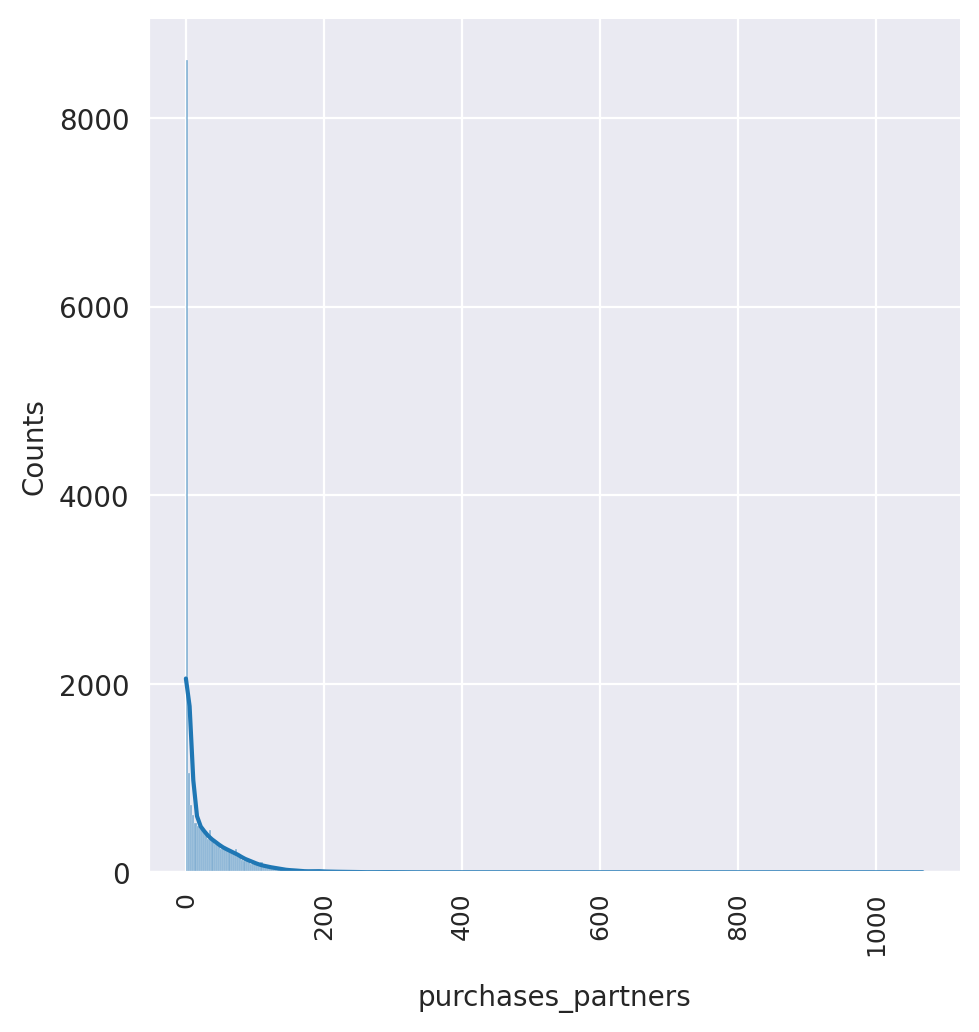

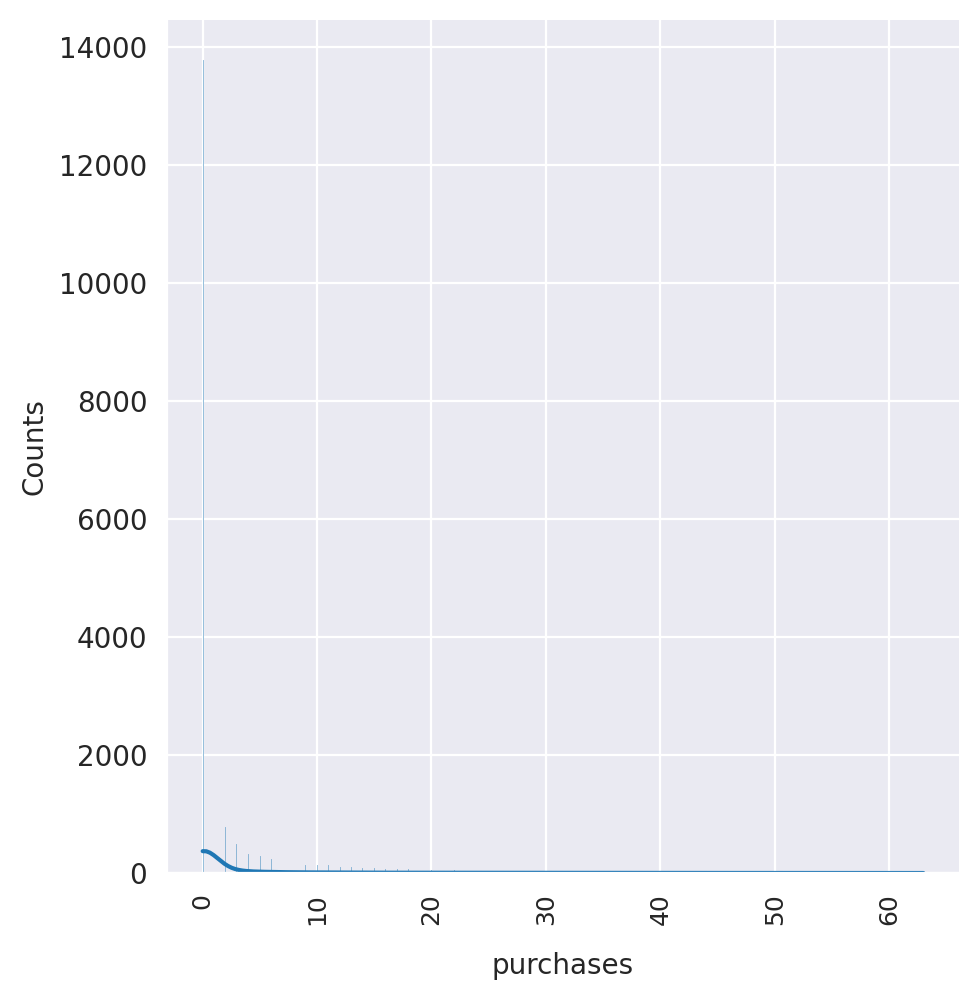

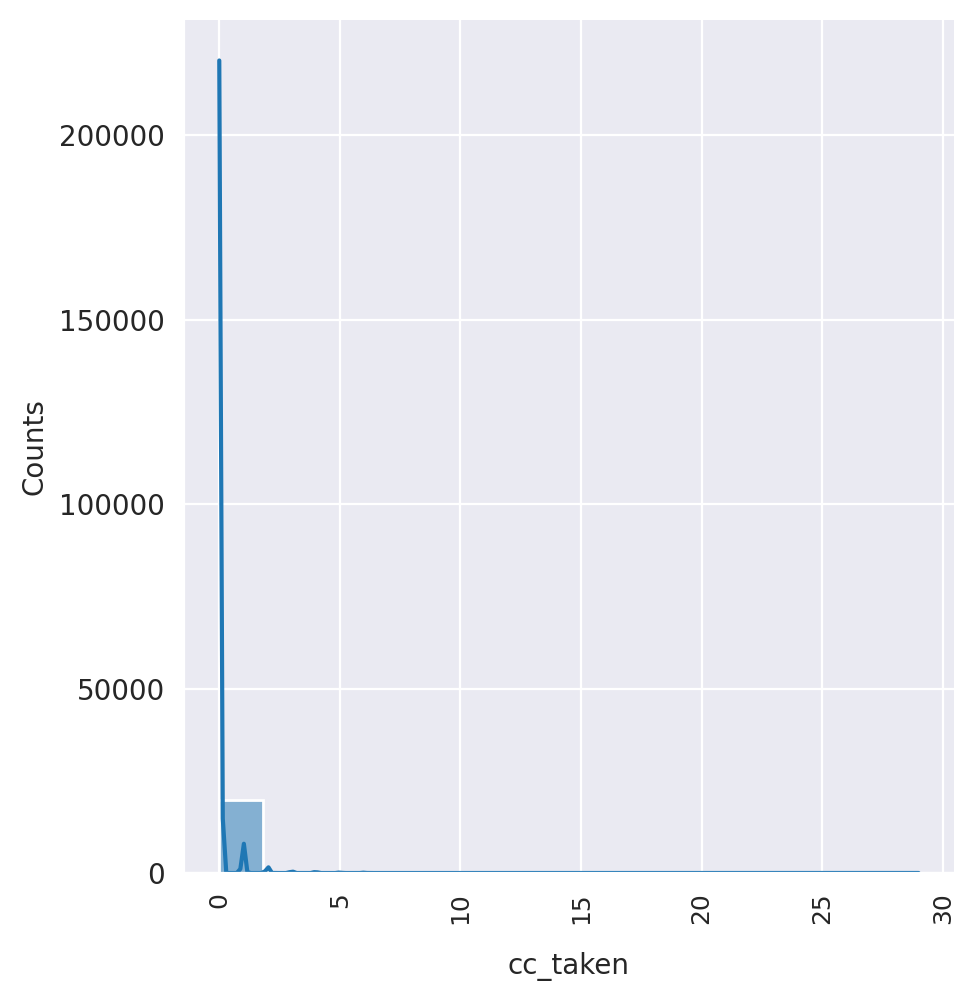

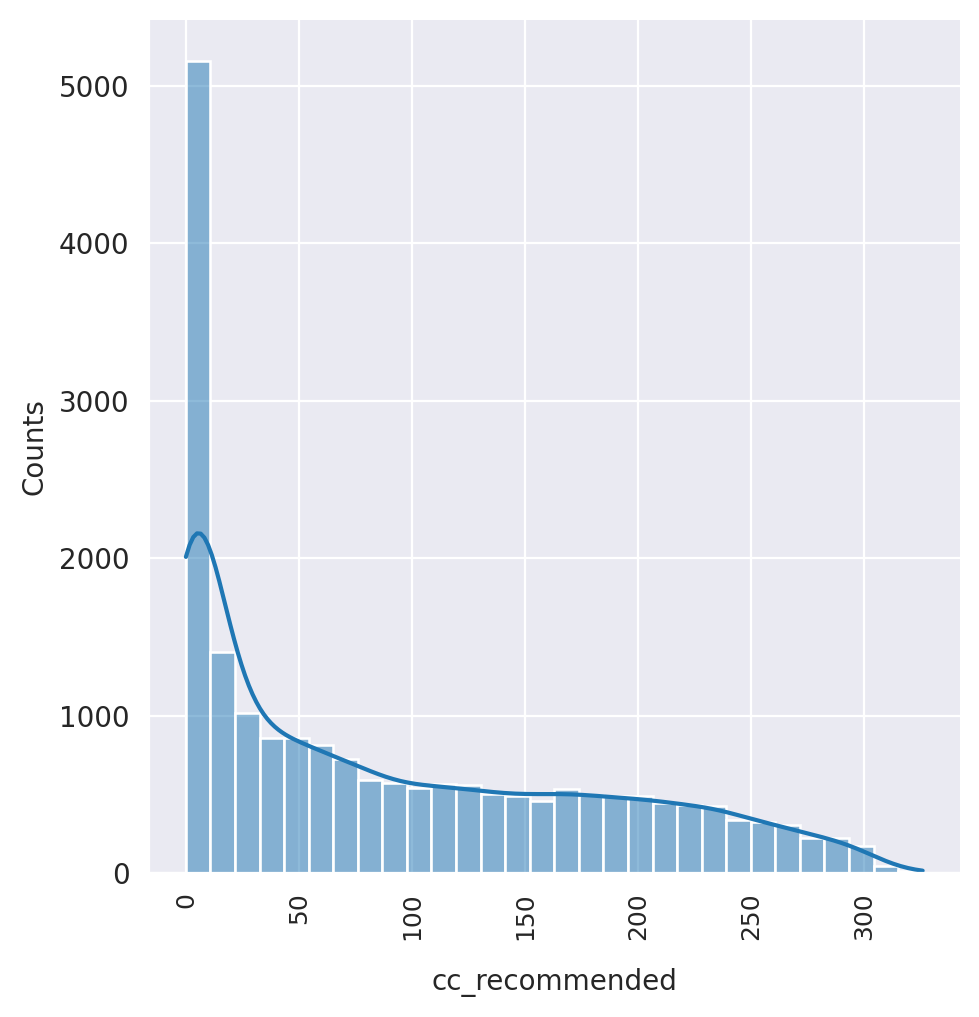

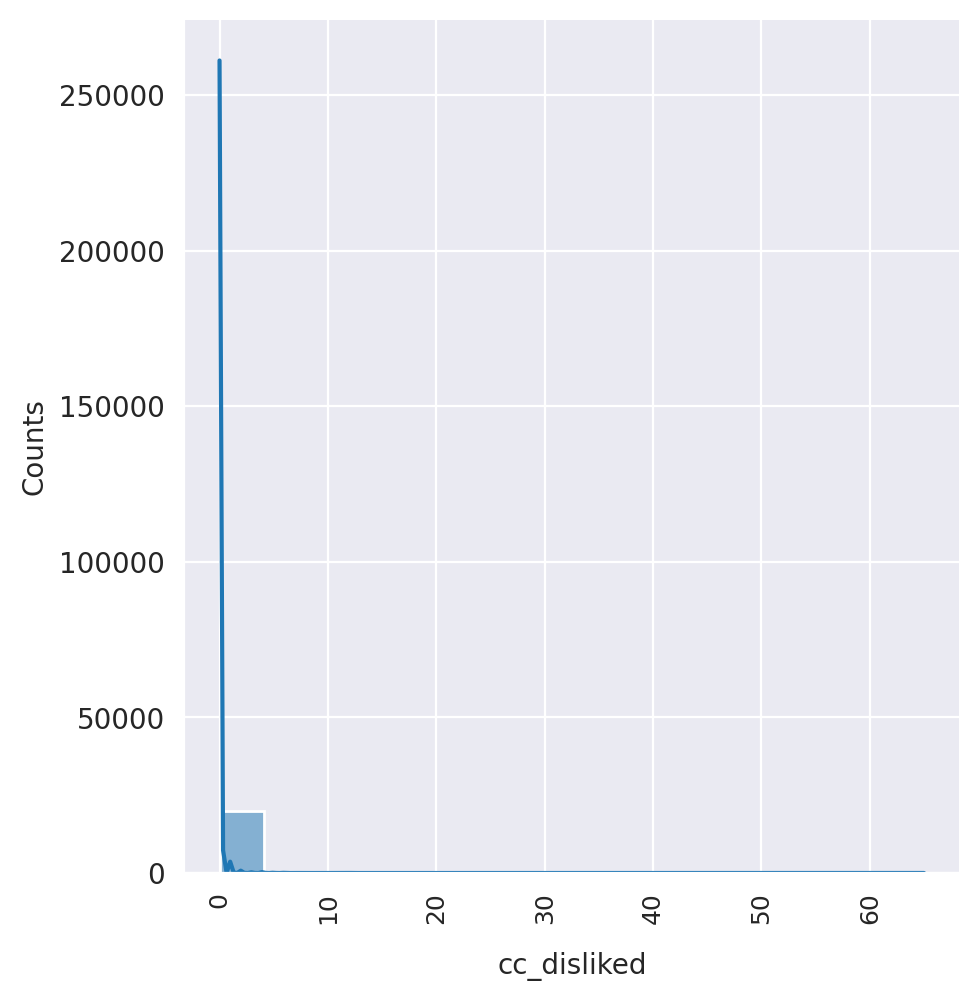

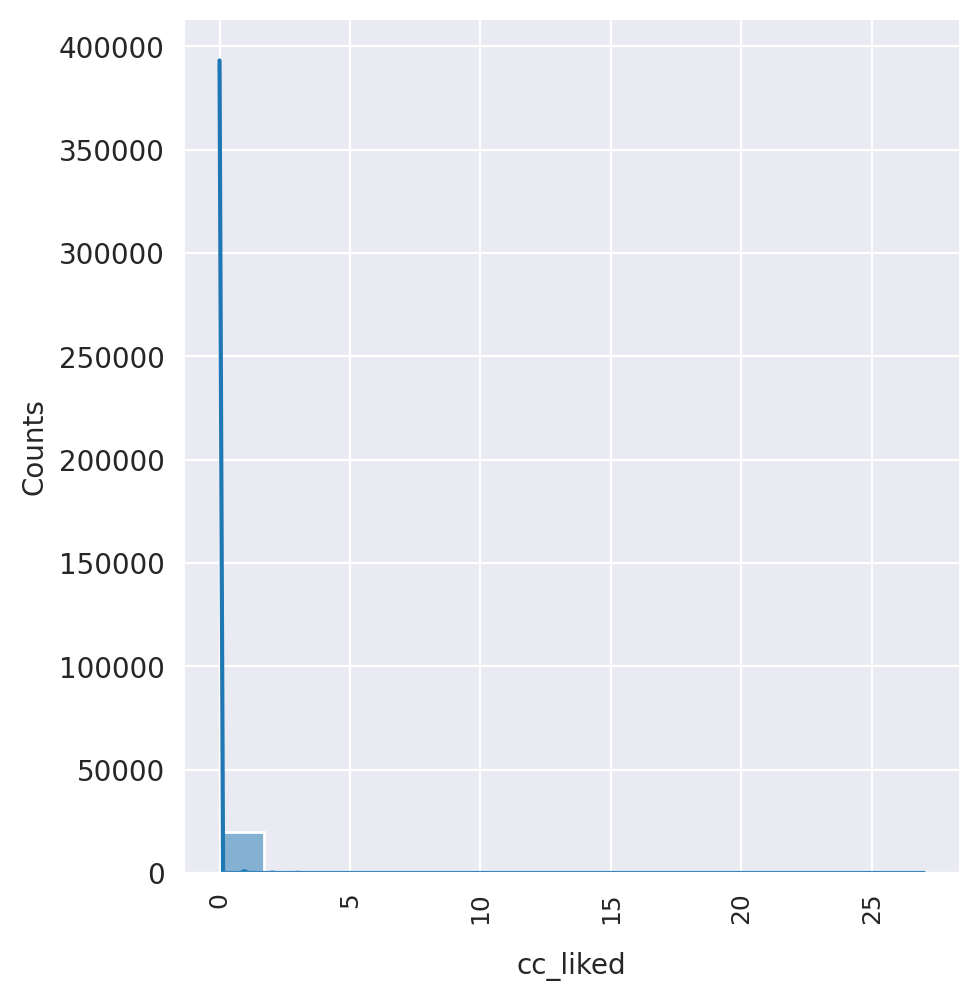

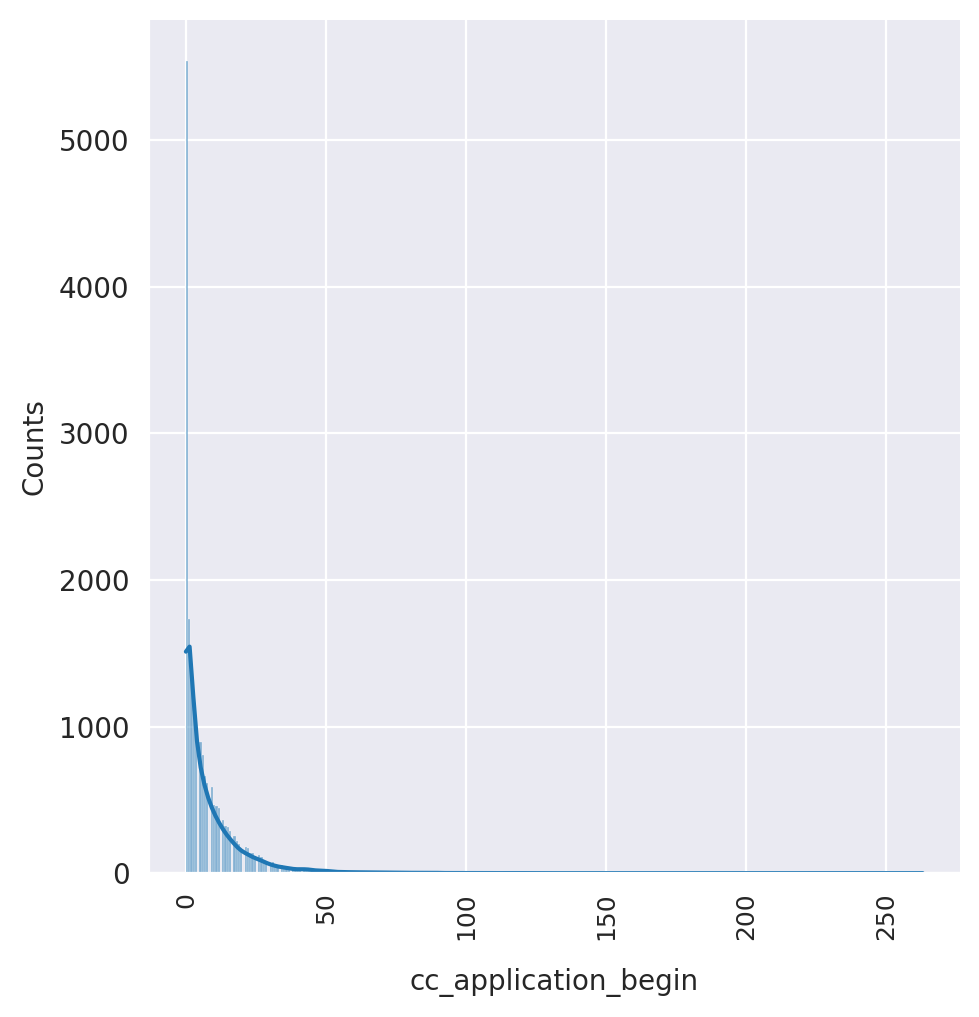

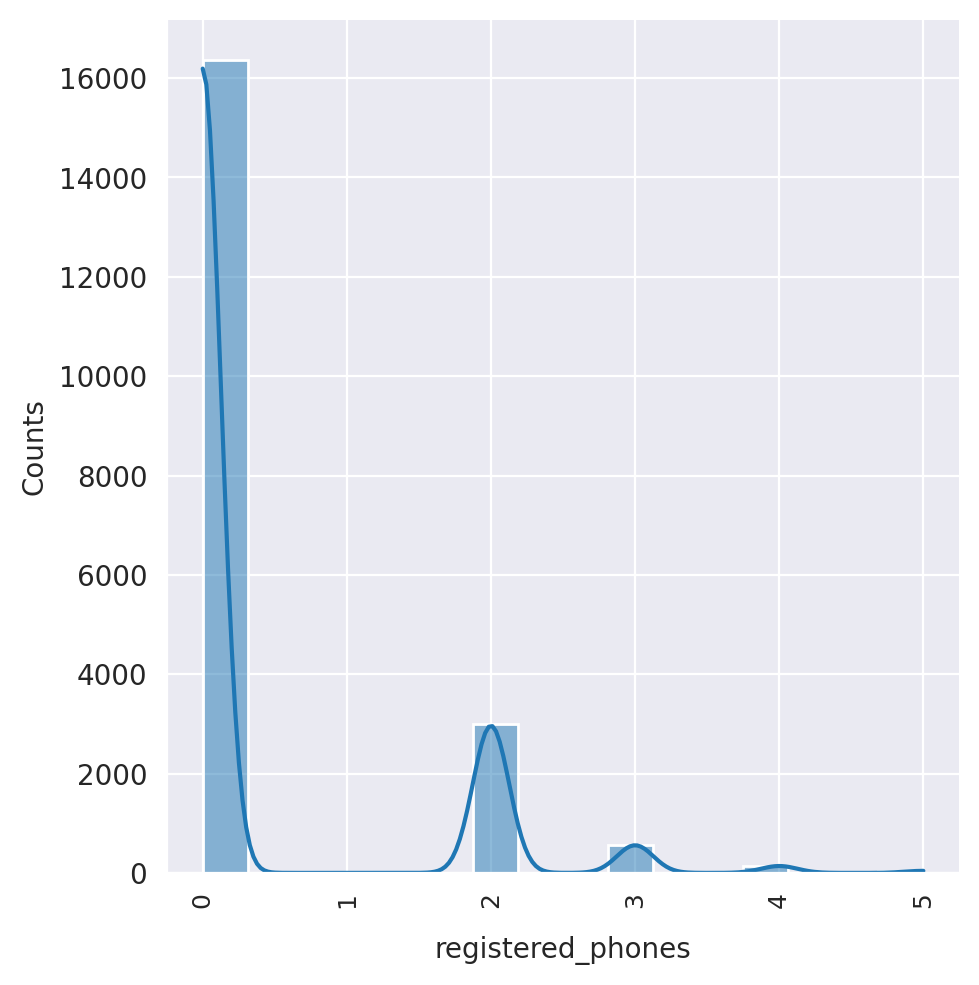

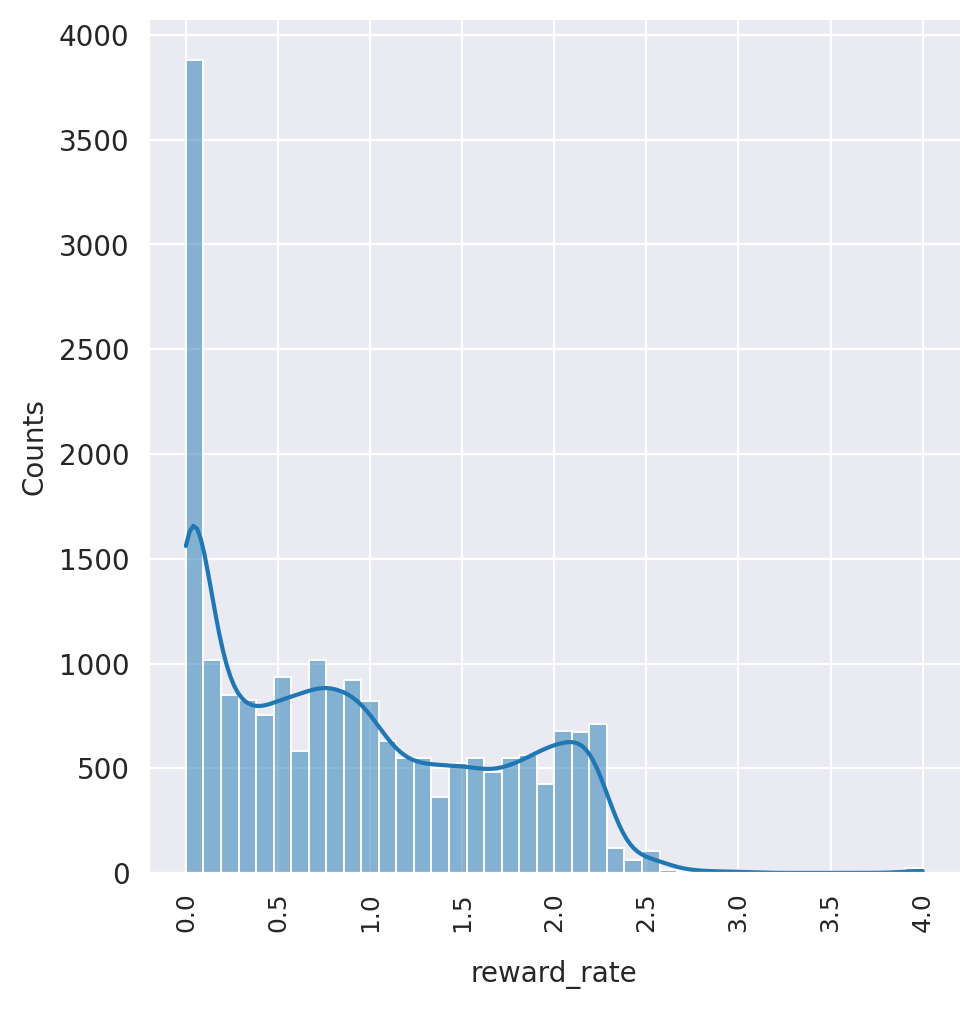

In [41]:
# Exploring the distribution about num_features_new values: 'age', 'credit_score', 'deposits' , 'purchases_partners', 'purchases', 'cc_recommended', 'cc_application_begin', 'rewards_earned', 'reward_rate'

for col in num_features_new:
    #plt.figure(figsize=(5,2))
    #sns.countplot(x=col, data=df)
    sns.displot(df[col], kde = True, height = 5 )
    plt.xticks(rotation=90, fontsize=9)
    plt.xlabel(col, labelpad=10)
    plt.ylabel('Counts')
    plt.show()

We can see that there are some features like 'deposits', 'withdrawal', 'purchases', 'cc_taken', 'cc_disliked', 'cc_liked', 'registered_phones' which has huge values as '0' than other values. Later during removing outliers, all the values will be 0, so those features are not useful. We have to remove them.

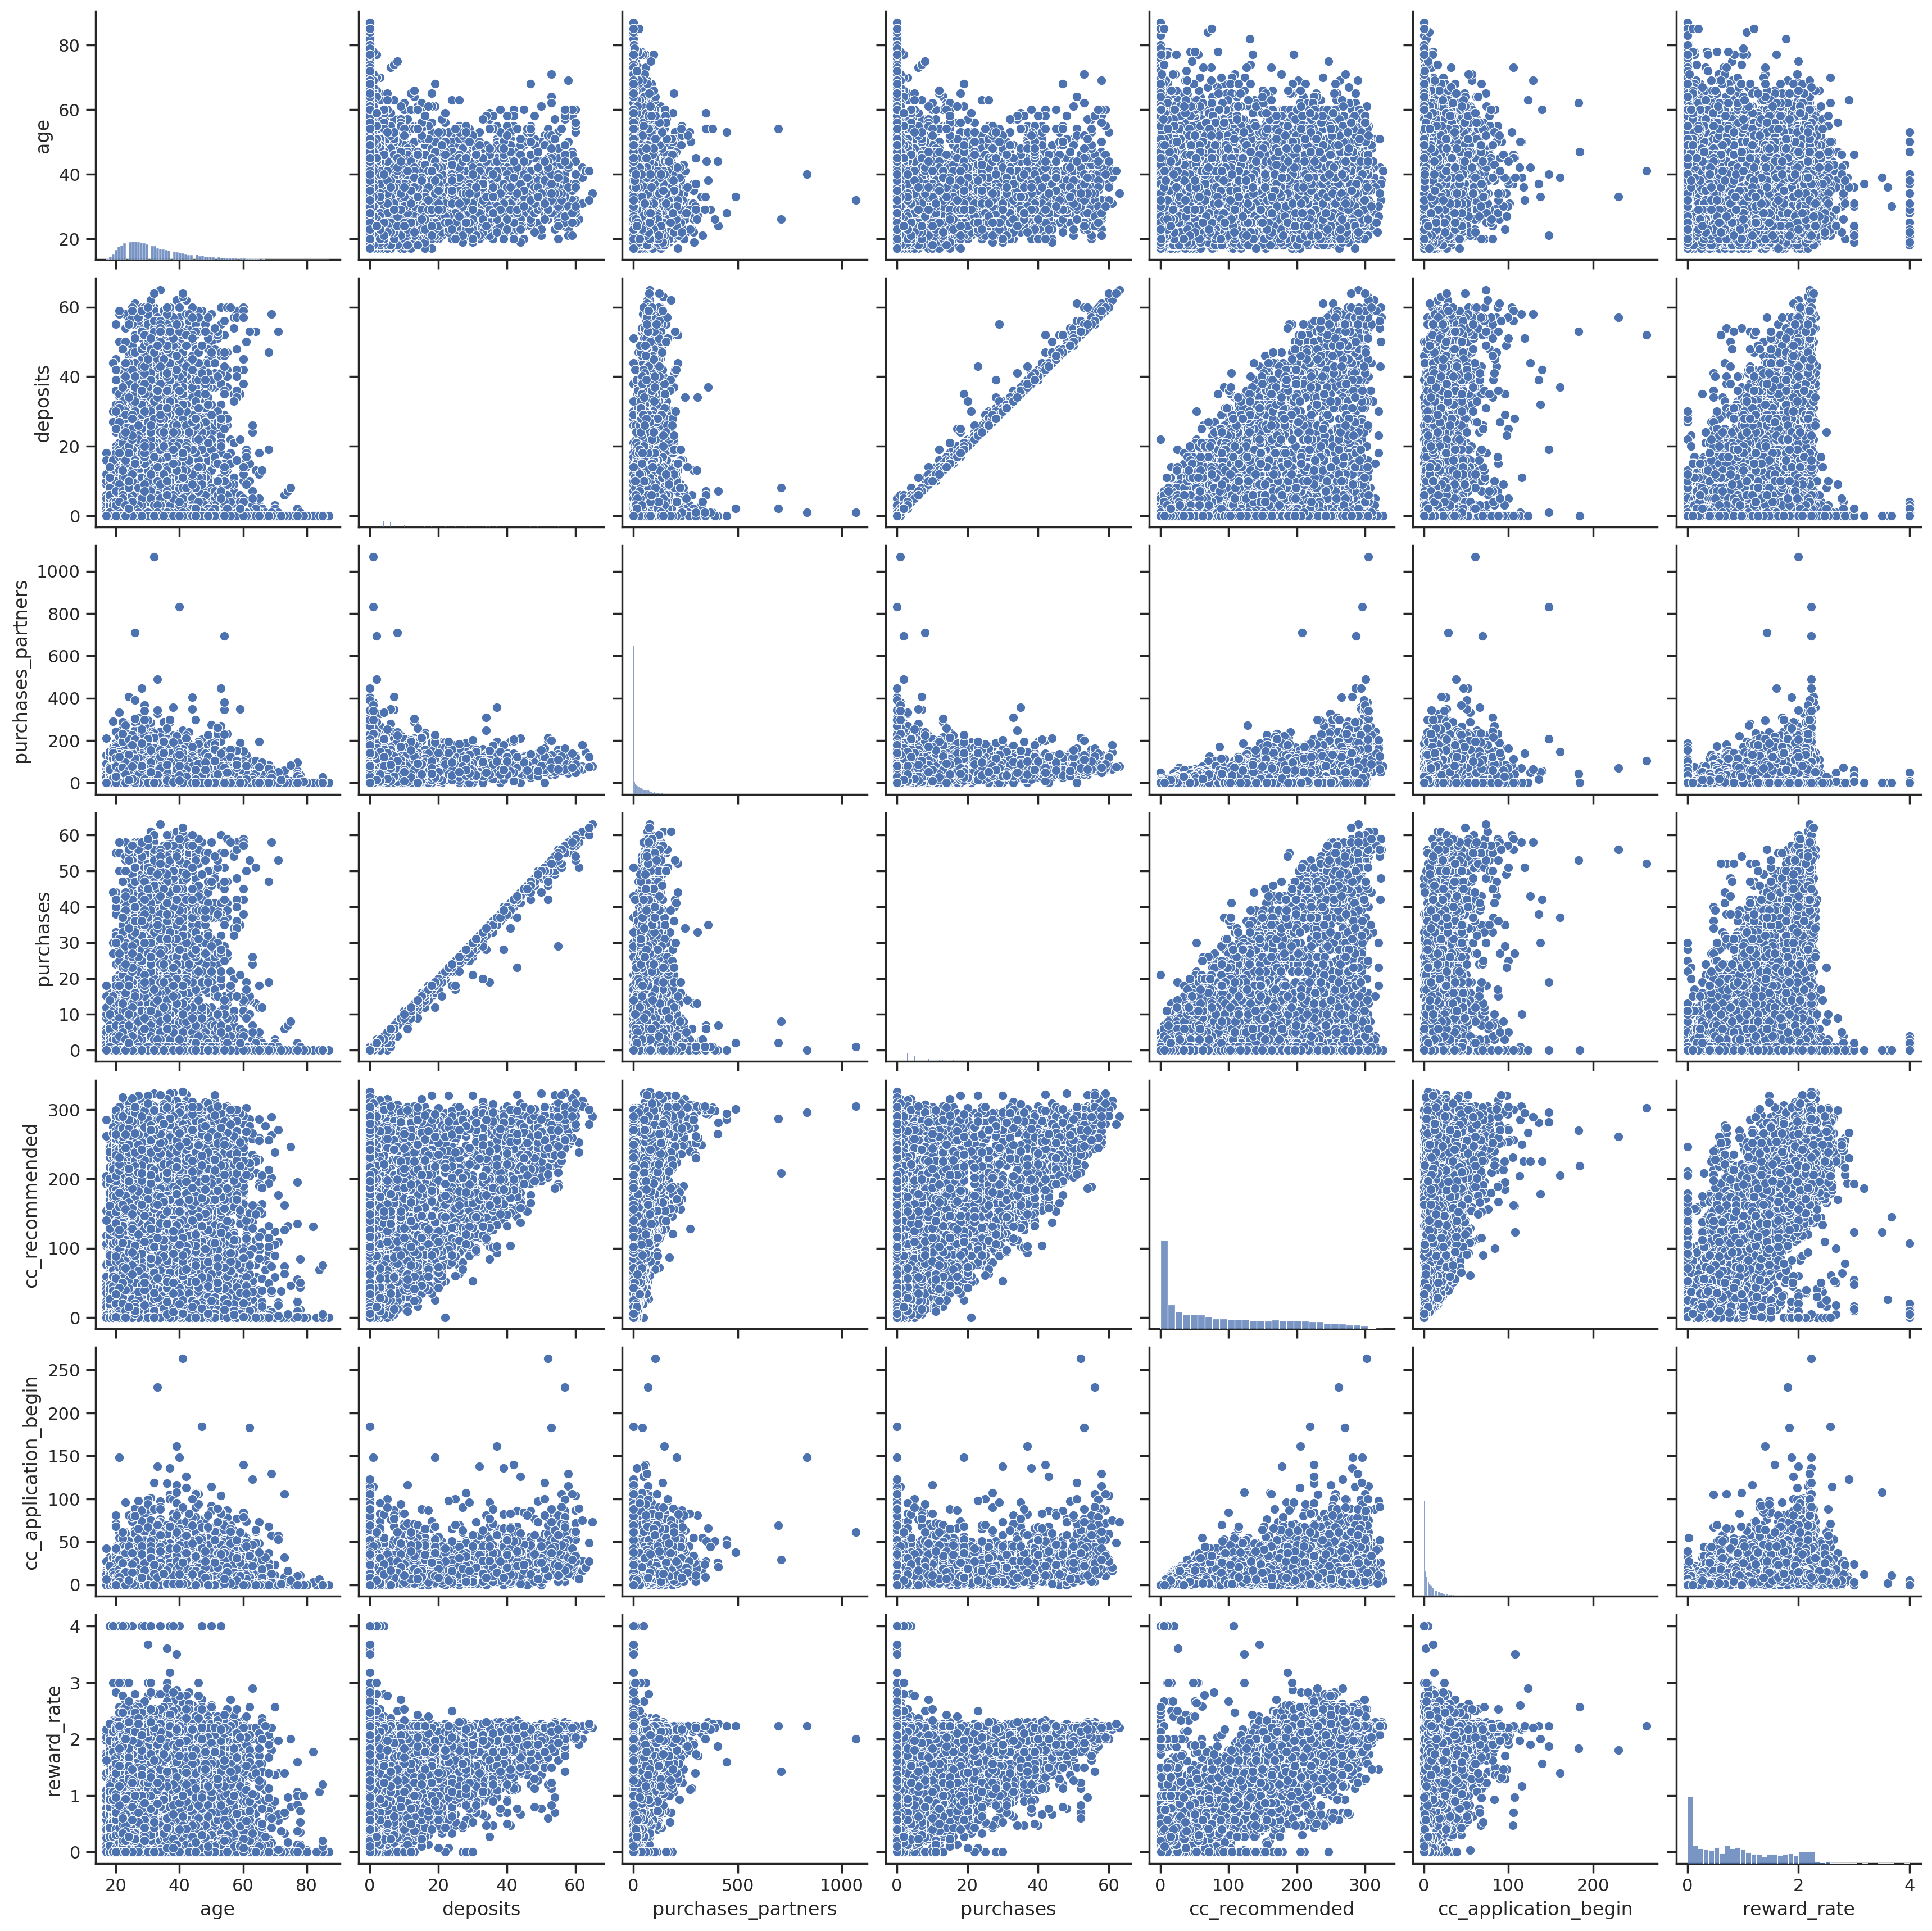

In [24]:
# Pair plot revision

sns.set(style="ticks", color_codes=True)
sns.pairplot(df[num_features_new], vars = num_features_new)
plt.show()

From those pair plots and distribution it seems like all of them are skewed right. This will lead into outlier behaviors.

In [43]:
print("Quantity of features:", len(num_features_bin))
print(num_features_bin)

Quantity of features: 13
['churn', 'app_downloaded', 'web_user', 'app_web_user', 'ios_user', 'android_user', 'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan', 'left_for_two_month_plus', 'left_for_one_month', 'is_referred']


We will ommit 'churn','app_downloaded', 'web_user', 'app_web_user', 'ios_user', 'android_user' because they already have been analyzed. So we focus in the rest.

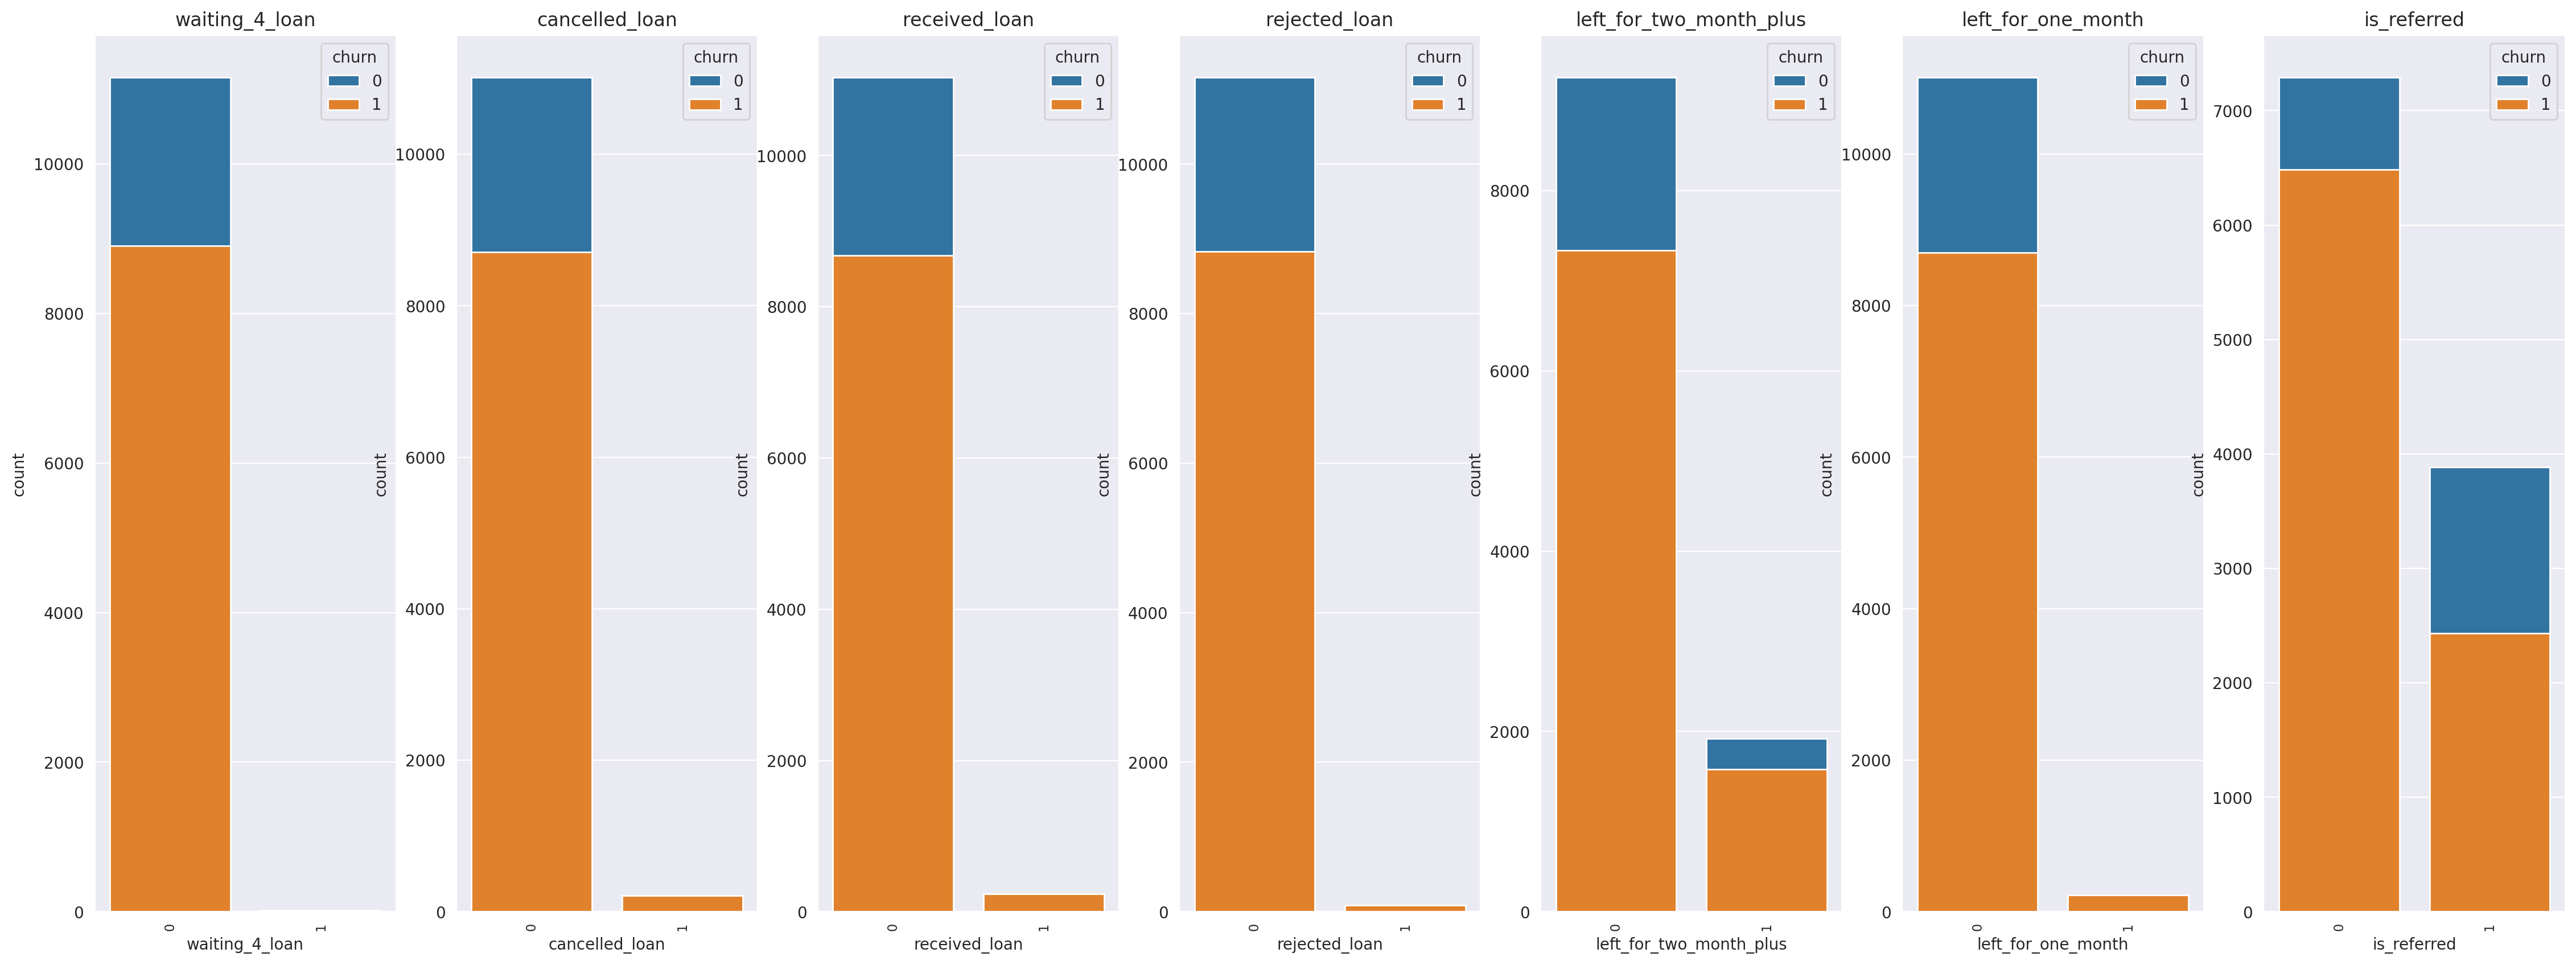

In [44]:
num_features_binary = ['waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan', 'left_for_two_month_plus', 'left_for_one_month', 'is_referred']

fig, axs = plt.subplots(1, len(num_features_binary), figsize=(28, 10))

for col, ax in enumerate(axs.flatten()):
    sns.countplot(x=num_features_binary[col], hue='churn', dodge=False, data=df, ax = axs[col])
    ax.set_title(num_features_binary[col])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)

We can see that there is one main insights:
- 'waiting_4_loan', 'cancelled_loan', 'received_loan', 'left_for_one_month','rejected_loan' have almost the same distribution regarded churn. We will only use one of them.
- The others seems have different behaviors.

## 5. Detecting outliers
We only will detect outliers in features which are not binary.

In [45]:
def detect_outlier(X):
    """
    X: dataframe
    """
    #X = df_new.iloc[:, :-1]
    #for i in range(len(X.columns)):
    for i in range(5): # Only priny the firs 5
        first_q = np.percentile(X[X.columns[i]], 25)
        third_q = np.percentile(X[X.columns[i]], 75) 
        IQR = 1.5*(third_q - first_q)
        minimum = first_q - IQR 
        maximum = third_q + IQR
        
        if(minimum > np.min(X[X.columns[i]]) or maximum < np.max(X[X.columns[i]])):
            print(X.columns[i], "There is Outlier")

In [46]:
detect_outlier(df[num_features_new])

age There is Outlier
deposits There is Outlier
withdrawal There is Outlier
purchases_partners There is Outlier
purchases There is Outlier


In [47]:
df[num_features_new].describe(percentiles=[0.01,0.25,0.5,0.75,0.99])

age      deposits    withdrawal  purchases_partners  \
count  20095.000000  20095.000000  20095.000000        20095.000000   
mean      32.151779      3.206519      0.295695           27.404927   
std        9.923122      8.901541      1.004642           41.946215   
min       17.000000      0.000000      0.000000            0.000000   
1%        18.000000      0.000000      0.000000            0.000000   
25%       25.000000      0.000000      0.000000            0.000000   
50%       30.000000      0.000000      0.000000            8.000000   
75%       37.000000      1.000000      0.000000           42.000000   
99%       63.000000     49.000000      5.000000          179.000000   
max       87.000000     65.000000     29.000000         1067.000000   

          purchases      cc_taken  cc_recommended   cc_disliked      cc_liked  \
count  20095.000000  20095.000000    20095.000000  20095.000000  20095.000000   
mean       3.143767      0.076586       91.736054      0.051555      0.012640   
std        8.740226      0.454627       88.291584      0.886025      0.247491   
min        0.000000      0.000000        0.000000      0.000000      0.000000   
1%         0.000000      0.000000        0.000000      0.000000      0.000000   
25%        0.000000      0.000000       10.000000      0.000000      0.000000   
50%        0.000000      0.000000       65.000000      0.000000      0.000000   
75%        1.000000      0.000000      161.000000      0.000000      0.000000   
99%       48.000000      2.000000      295.000000      1.000000      0.000000   
max       63.000000     29.000000      326.000000     65.000000     27.000000   

       cc_application_begin  registered_phones   reward_rate  
count          20095.000000       20095.000000  20095.000000  
mean               8.108534           0.420204      0.902362  
std               12.422516           0.913710      0.750447  
min                0.000000           0.000000      0.000000  
1%                 0.000000           0.000000      0.000000  
25%                0.000000           0.000000      0.200000  
50%                4.000000           0.000000      0.770000  
75%               11.000000           0.000000      1.500000  
99%               57.000000           3.000000      2.470000  
max              263.000000           5.000000      4.000000

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'age'),
  Text(2, 0, 'deposits'),
  Text(3, 0, 'withdrawal'),
  Text(4, 0, 'purchases_partners'),
  Text(5, 0, 'purchases'),
  Text(6, 0, 'cc_taken'),
  Text(7, 0, 'cc_recommended'),
  Text(8, 0, 'cc_disliked'),
  Text(9, 0, 'cc_liked'),
  Text(10, 0, 'cc_application_begin'),
  Text(11, 0, 'registered_phones'),
  Text(12, 0, 'reward_rate')])

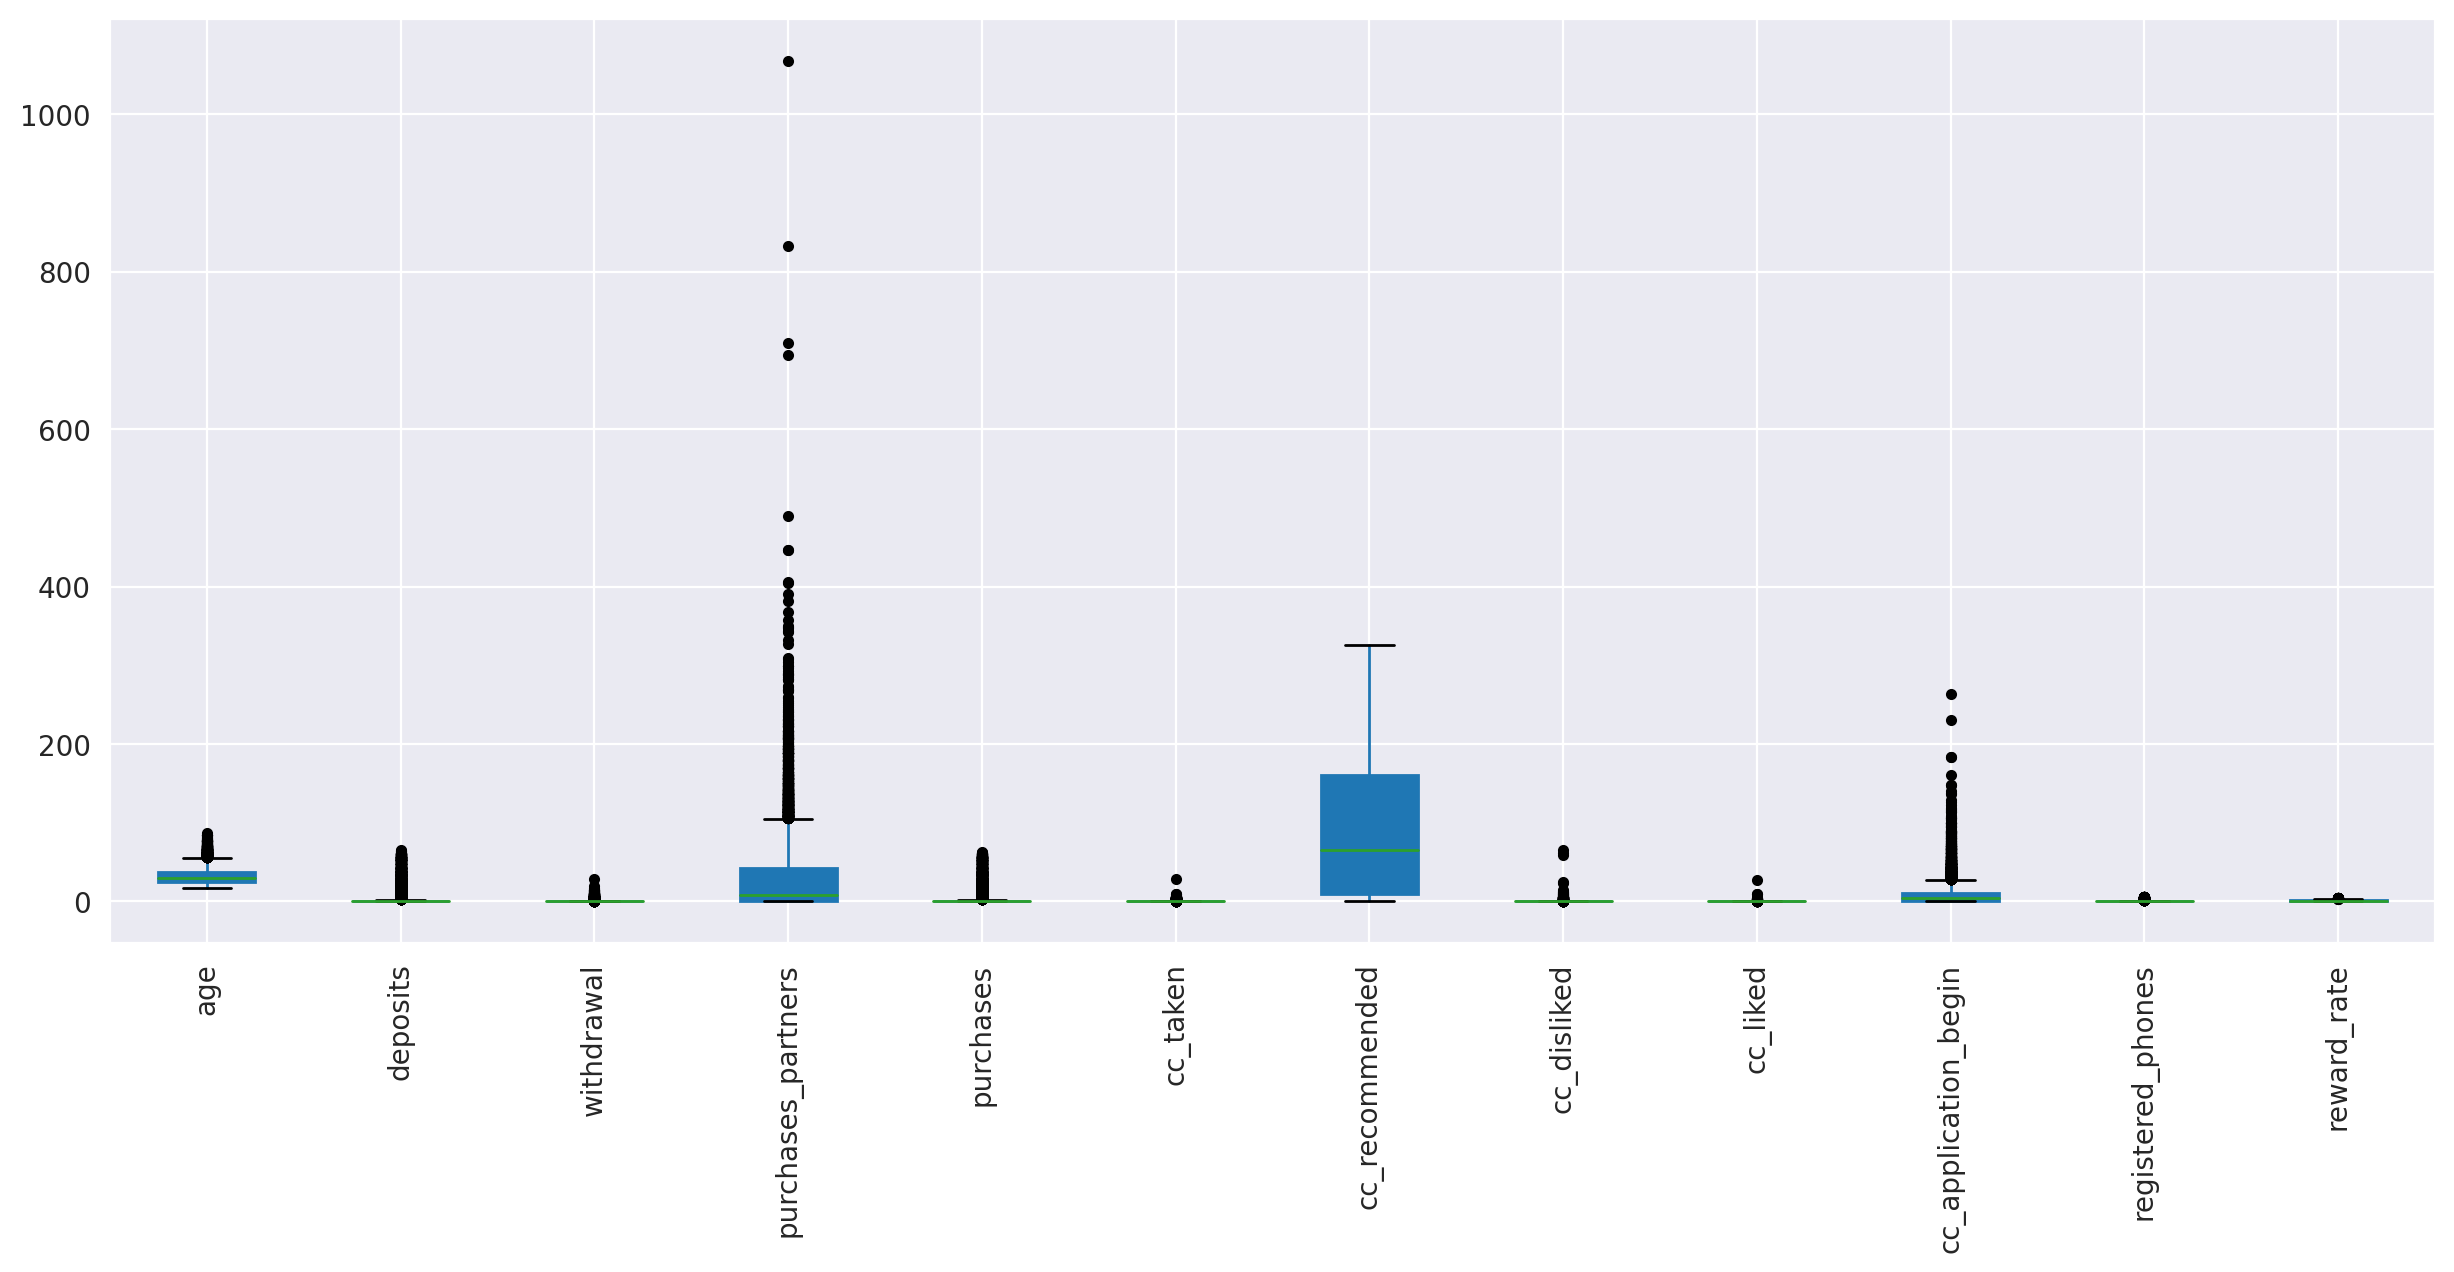

In [48]:
plt.subplots(figsize=(15,6))
df[num_features_new].boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

As we can see there are 'age', 'purchases_partners' and 'cc_application_begin' have outliers. On the other hand, the others its mean is on 0 which means most of all these values are 0. So later during removing outliers, these features will have only one value '0'. They should be removed.

## 6. Analysis of Churn over features


In [31]:
df.describe()

churn           age      deposits    withdrawal  \
count  20095.000000  20095.000000  20095.000000  20095.000000   
mean       0.443692     32.151779      3.206519      0.295695   
std        0.496832      9.923122      8.901541      1.004642   
min        0.000000     17.000000      0.000000      0.000000   
25%        0.000000     25.000000      0.000000      0.000000   
50%        0.000000     30.000000      0.000000      0.000000   
75%        1.000000     37.000000      1.000000      0.000000   
max        1.000000     87.000000     65.000000     29.000000   

       purchases_partners     purchases      cc_taken  cc_recommended  \
count        20095.000000  20095.000000  20095.000000    20095.000000   
mean            27.404927      3.143767      0.076586       91.736054   
std             41.946215      8.740226      0.454627       88.291584   
min              0.000000      0.000000      0.000000        0.000000   
25%              0.000000      0.000000      0.000000       10.000000   
50%              8.000000      0.000000      0.000000       65.000000   
75%             42.000000      1.000000      0.000000      161.000000   
max           1067.000000     63.000000     29.000000      326.000000   

        cc_disliked      cc_liked  ...  android_user  registered_phones  \
count  20095.000000  20095.000000  ...  20095.000000       20095.000000   
mean       0.051555      0.012640  ...      0.586763           0.420204   
std        0.886025      0.247491  ...      0.492427           0.913710   
min        0.000000      0.000000  ...      0.000000           0.000000   
25%        0.000000      0.000000  ...      0.000000           0.000000   
50%        0.000000      0.000000  ...      1.000000           0.000000   
75%        0.000000      0.000000  ...      1.000000           0.000000   
max       65.000000     27.000000  ...      1.000000           5.000000   

       waiting_4_loan  cancelled_loan  received_loan  rejected_loan  \
count    20095.000000    20095.000000   20095.000000   20095.000000   
mean         0.001344        0.018562       0.018960       0.005175   
std          0.036632        0.134975       0.136387       0.071756   
min          0.000000        0.000000       0.000000       0.000000   
25%          0.000000        0.000000       0.000000       0.000000   
50%          0.000000        0.000000       0.000000       0.000000   
75%          0.000000        0.000000       0.000000       0.000000   
max          1.000000        1.000000       1.000000       1.000000   

       left_for_two_month_plus  left_for_one_month   reward_rate   is_referred  
count             20095.000000        20095.000000  20095.000000  20095.000000  
mean                  0.174073            0.019159      0.902362      0.314506  
std                   0.379182            0.137087      0.750447      0.464330  
min                   0.000000            0.000000      0.000000      0.000000  
25%                   0.000000            0.000000      0.200000      0.000000  
50%                   0.000000            0.000000      0.770000      0.000000  
75%                   0.000000            0.000000      1.500000      1.000000  
max                   1.000000            1.000000      4.000000      1.000000  

[8 rows x 25 columns]

Analysis 1: Whats the main age group of customers ? and Which age group of customers churn more ?

Text(0, 0.5, 'Age')

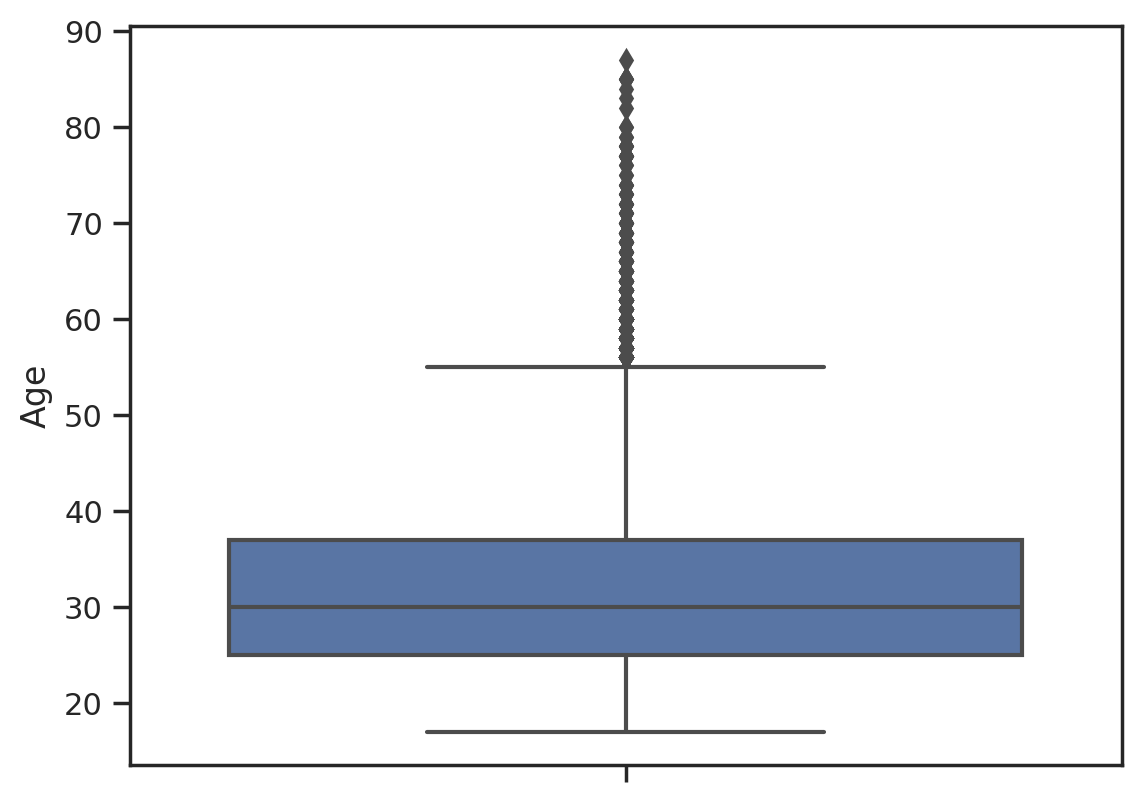

In [33]:
sns.boxplot(y = df['age'], data = df)
plt.ylabel('Age')

In [34]:
age_group = df[(df.age>20)& (df.age<80)]
df_filtered = age_group.groupby(['age', 'churn'])['deposits'].count().reset_index()
b = pd.pivot_table(df_filtered, values='deposits', index='age',columns=['churn']).reset_index()
b.head()

churn   age      0      1
0      21.0  373.0  397.0
1      22.0  409.0  410.0
2      23.0  519.0  437.0
3      24.0  573.0  449.0
4      25.0  580.0  478.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 [Text(0, 0, '21.0'),
  Text(1, 0, '22.0'),
  Text(2, 0, '23.0'),
  Text(3, 0, '24.0'),
  Text(4, 0, '25.0'),
  Text(5, 0, '26.0'),
  Text(6, 0, '27.0'),
  Text(7, 0, '28.0'),
  Text(8, 0, '29.0'),
  Text(9, 0, '30.0'),
  Text(10, 0, '31.0'),
  Text(11, 0, '32.0'),
  Text(12, 0, '33.0'),
  Text(13, 0, '34.0'),
  Text(14, 0, '35.0'),
  Text(15, 0, '36.0'),
  Text(16, 0, '37.0'),
  Text(17, 0, '38.0'),
  Text(18, 0, '39.0'),
  Text(19, 0, '40.0'),
  Text(20, 0, '41.0'),
  Text(21, 0, '42.0'),
  Text(22, 0, '43.0'),
  Text(23, 0, '44.0'),
  Text(24, 0, '45.0'),
  Text(25, 0, '46.0'),
  Text(26, 0, '47.0'),
  Text(27, 0, '48.0'),
  Text(28, 0, '49.0'),
  Text(29, 0, '50.0'),
  Text(30, 0, '51.0'),
  Text(31, 0, '52.0'),
  Te

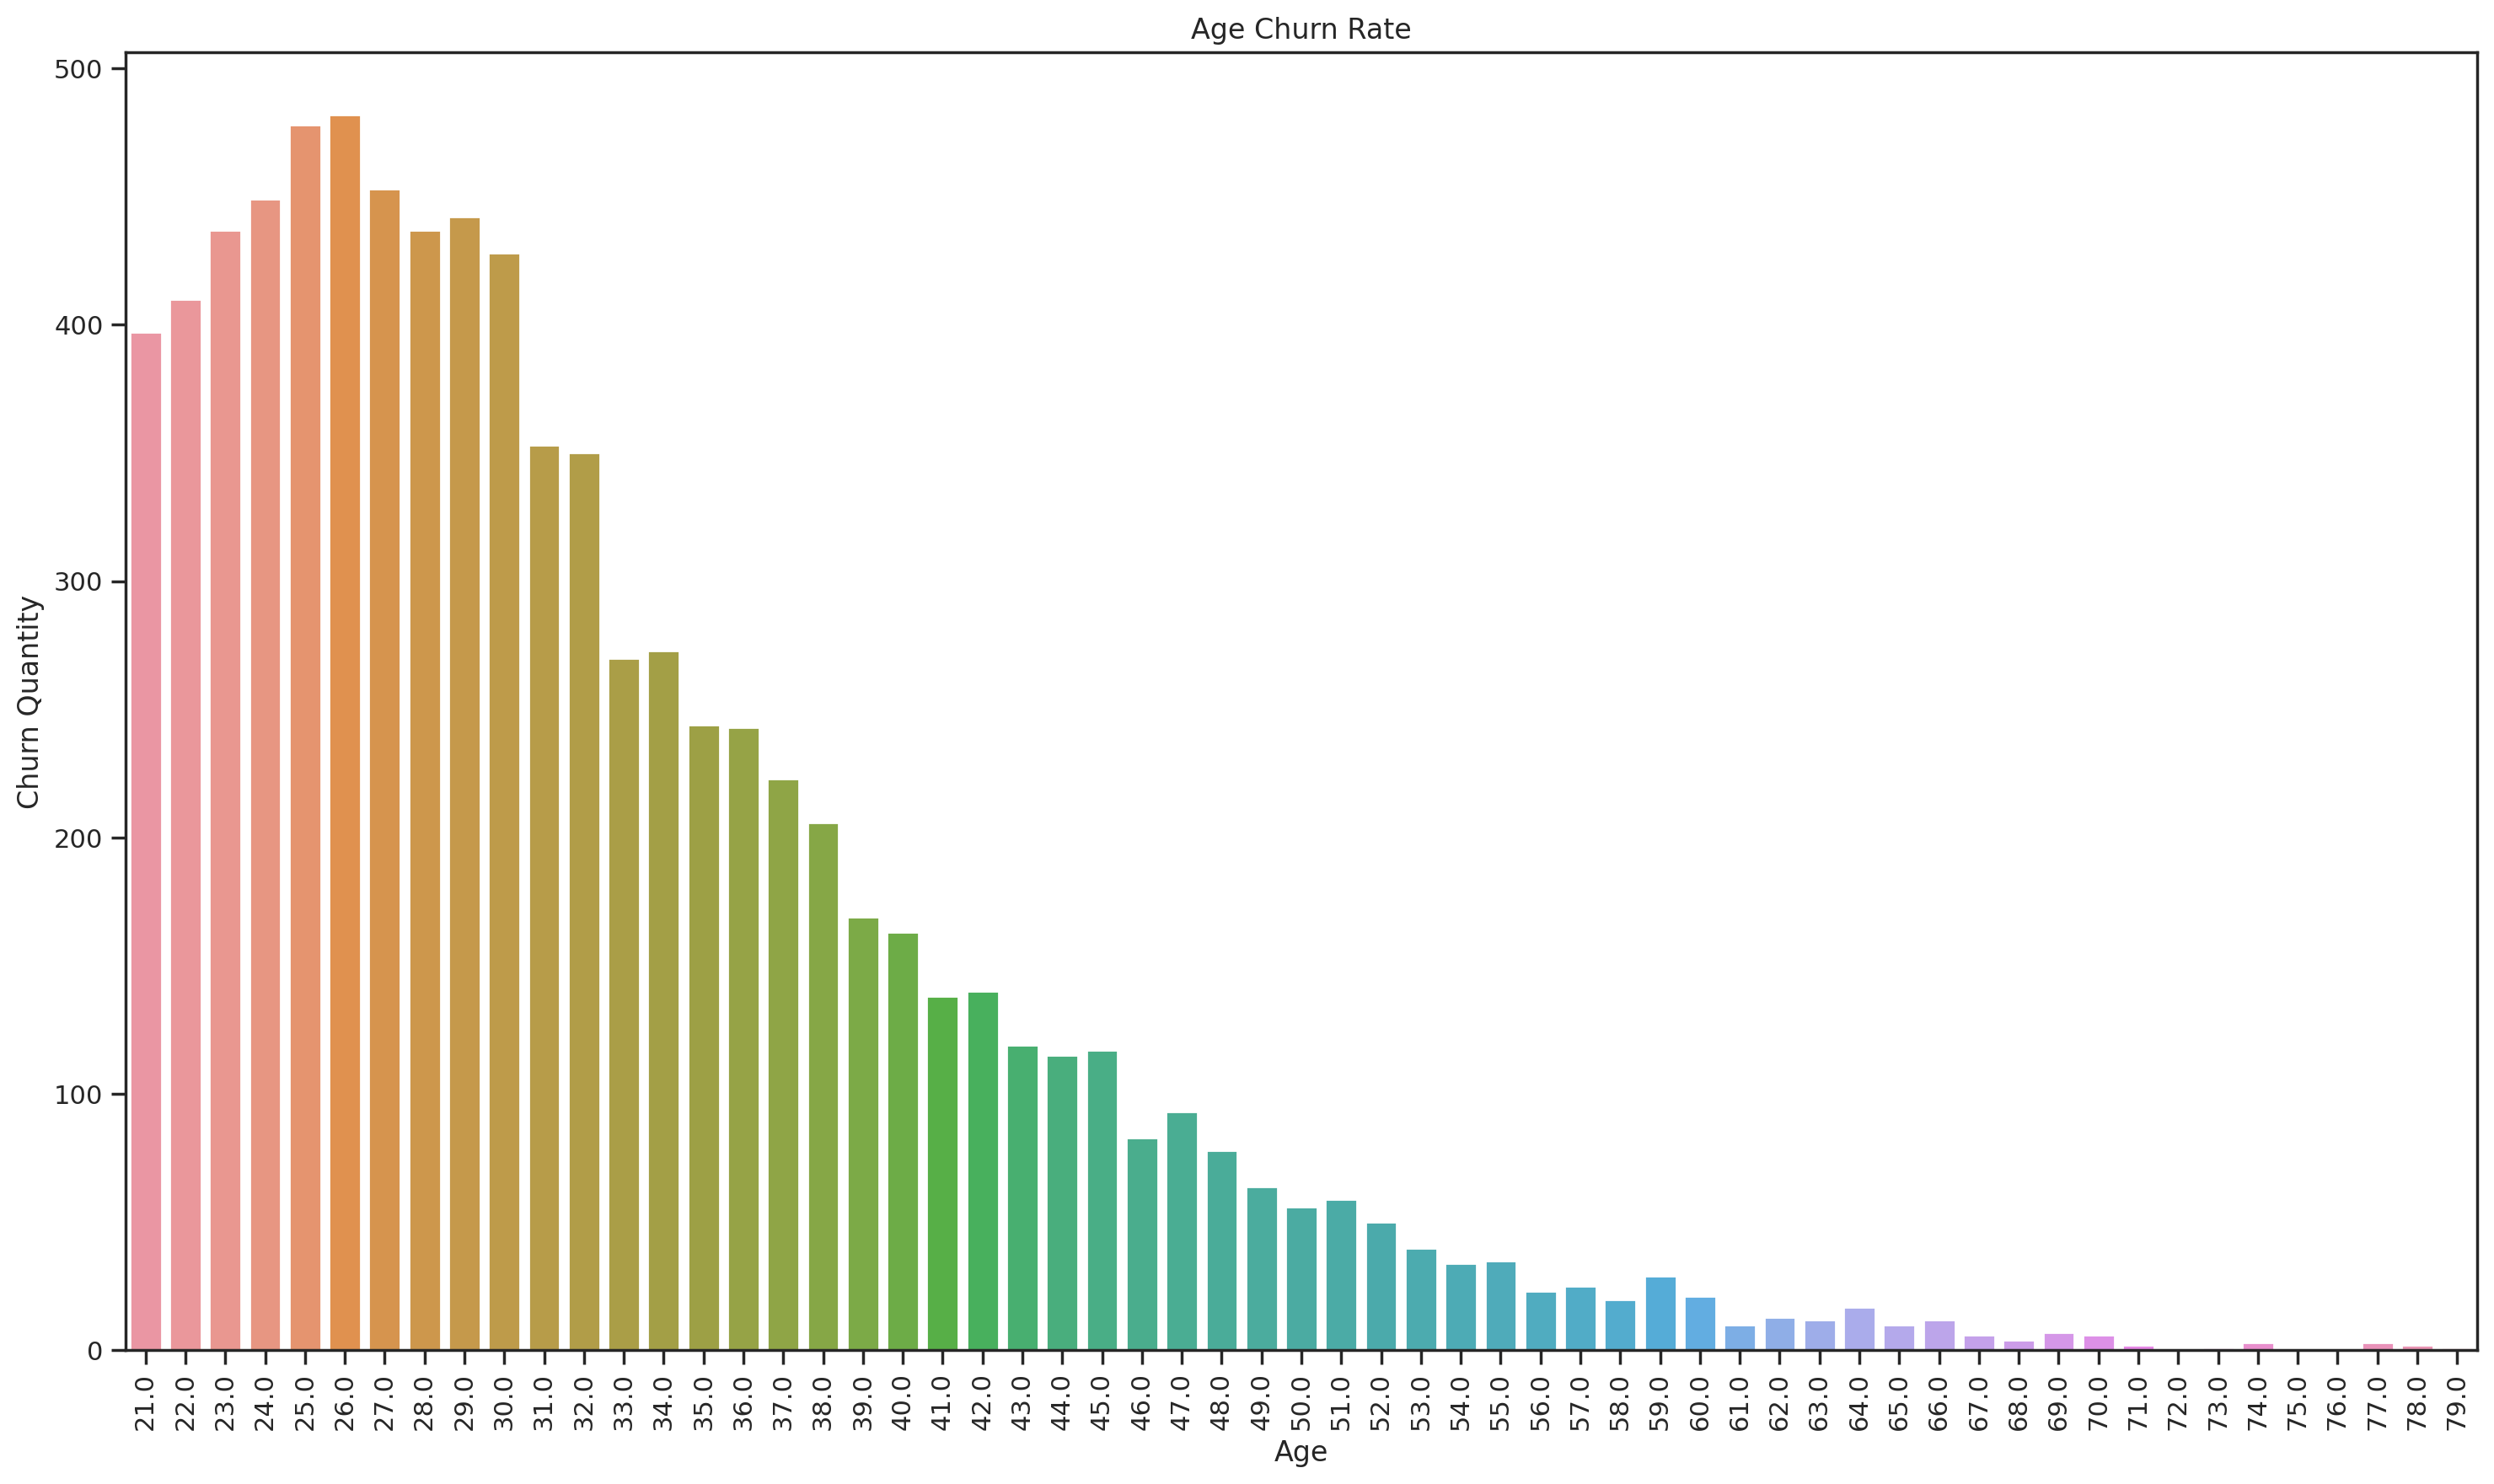

In [35]:
plt.figure(figsize=(18,10))
sns.barplot(x = 'age', y = 1 , data = b)
plt.xlabel('Age')
plt.ylabel('Churn Quantity')
plt.title('Age Churn Rate')
plt.xticks(rotation=90)

From picture we can see that people between 21 and 32 churn more than older people.

Analysis 2: People who makes deposits churn? or People who makes purchases churn?

In [36]:
df_filtered = df.groupby(['deposits', 'churn'])['housing'].count().reset_index()
b = pd.pivot_table(df_filtered, values='housing', index='deposits',columns=['churn']).reset_index()
b.head()

churn  deposits       0       1
0             0  6909.0  6757.0
1             1  1141.0   655.0
2             2   480.0   316.0
3             3   312.0   182.0
4             4   224.0   110.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(3

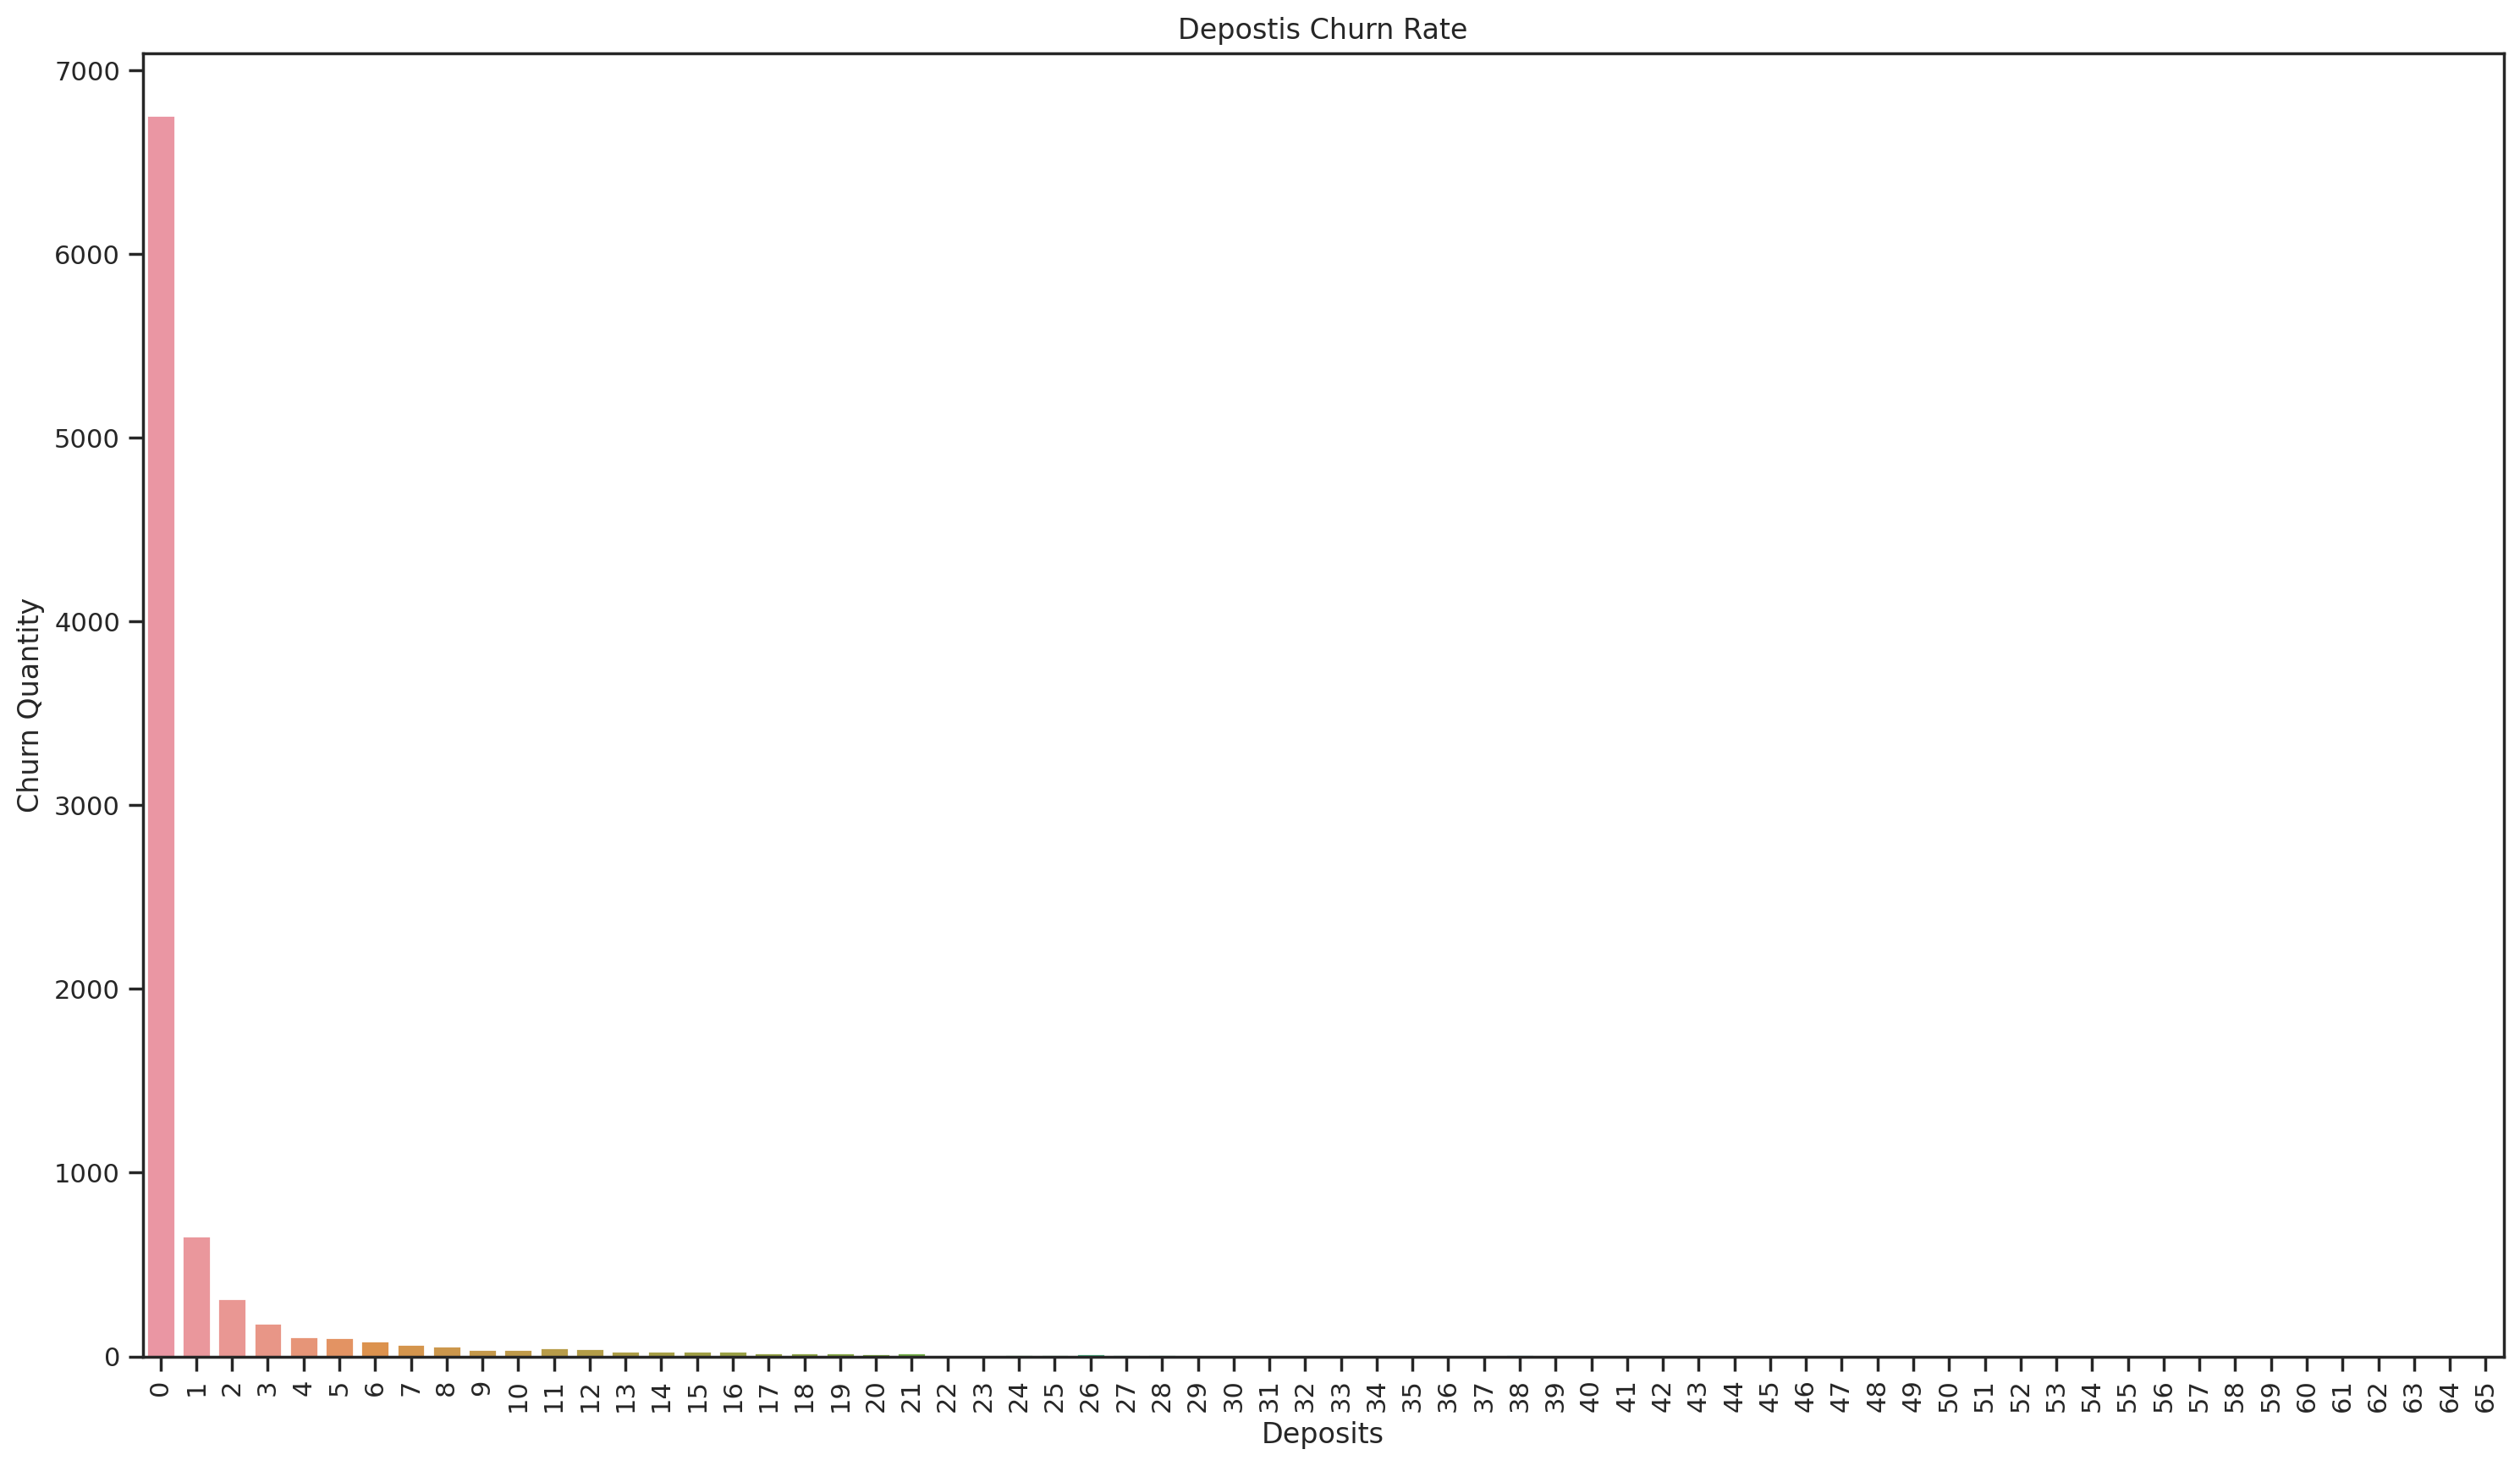

In [37]:
plt.figure(figsize=(18,10))
sns.barplot(x = 'deposits', y = 1 , data = b)
plt.xlabel('Deposits')
plt.ylabel('Churn Quantity')
plt.title('Depostis Churn Rate')
plt.xticks(rotation=90)

We can see from picture that peoplo who does not make any deposit or purchase churn more. It is logic.

In [38]:
df_filtered = df.groupby(['purchases', 'churn'])['housing'].count().reset_index()
b = pd.pivot_table(df_filtered, values='housing', index='purchases',columns=['churn']).reset_index()
b.head()

churn  purchases       0       1
0              0  6968.0  6800.0
1              1  1111.0   630.0
2              2   471.0   304.0
3              3   315.0   182.0
4              4   217.0   113.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '3

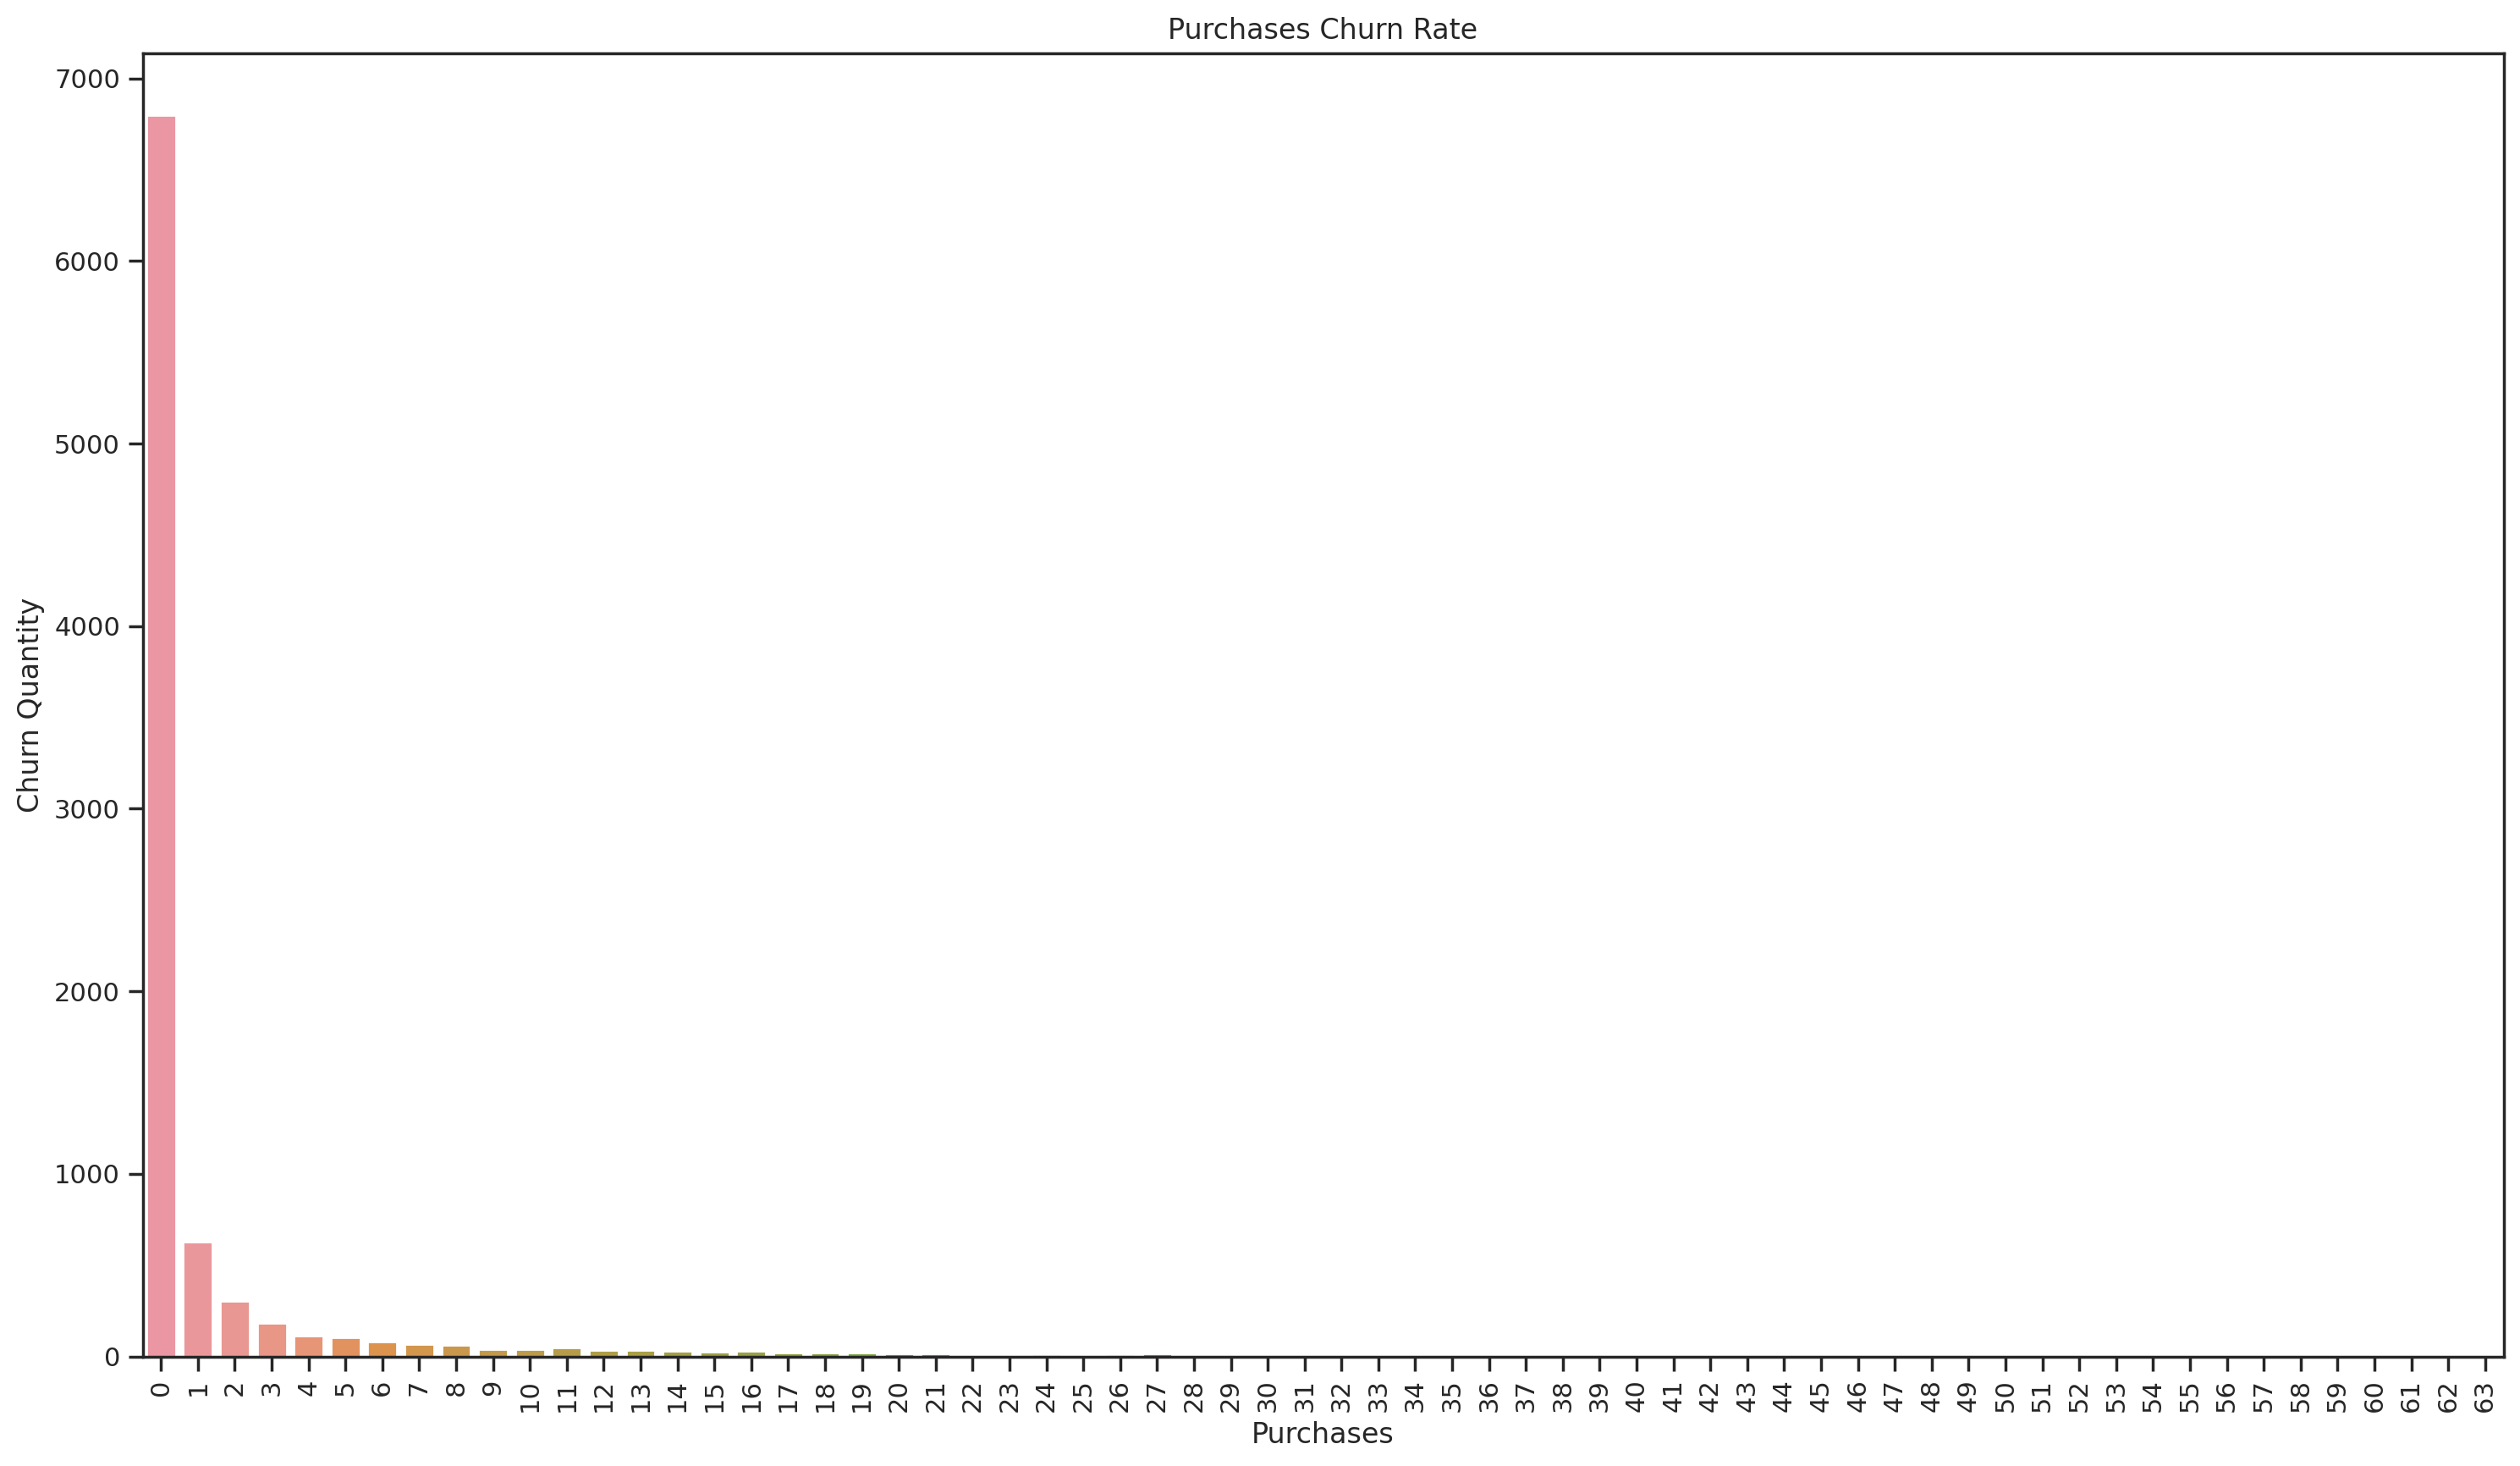

In [39]:
plt.figure(figsize=(18,10))
sns.barplot(x = 'purchases', y = 1 , data = b)
plt.xlabel('Purchases')
plt.ylabel('Churn Quantity')
plt.title('Purchases Churn Rate')
plt.xticks(rotation=90)

## 7. Conclusions after exploration

- Peopoble who does not make any deposits or do any purchase with the app churn more
- From picture we can see that people between 21 and 32 churn more than older people.
- As we can see there are 'age', 'purchases_partners' and 'cc_application_begin' have outliers. On the other hand, the others its mean is on 0 which means most of all these values are 0. So later during removing outliers, these features will have only one value '0'. They should be removed.
- 'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan', 'left_for_one_month' have almost the same distribution regarded churn. We will only use one of them.
- From correlation matrix, correlation 0.91 between app_web_user and web_user. It means they are positively depended so we can ommit one of them.
- From correlation matrix, correlation 0.88 between reward_rate and cc_recommended. It means they are positively depended so we can ommit one of them.
- From correlation matrix, correlation -0.84 between android_user and ios_user. It means they are negatively depended so we can ommit one of them.
- From correlation matrix, correlation 1 between purchases and deposit. It means they are positively depended so we can ommit one of them.
- From Categorical values, The people who has the Bi-weekly payment_type churn more than others.
- From Categorical values, The people who Rent(R) churn more than people who Own(O) his home.
- From Categorical values, these values should be traslate to numbers with one hot encoding technique in order to keep the size of dataset. There are a lot of  'na' values. We cannot remove them. We need to consider these values as no house, no payment_type, no zodiac_sign.
- As we can see, the ratio of the class variable is almost balanced. SO in this way, we won't need to use any technique for balance them.
- We can see that there are some features like 'deposits', 'withdrawal', 'purchases', 'cc_taken', 'cc_disliked', 'cc_liked', 'registered_phones' which has huge values as '0' than other values. Lated during removing outliers, all the values will be 0, so those features are not useful. We have to remove them.
